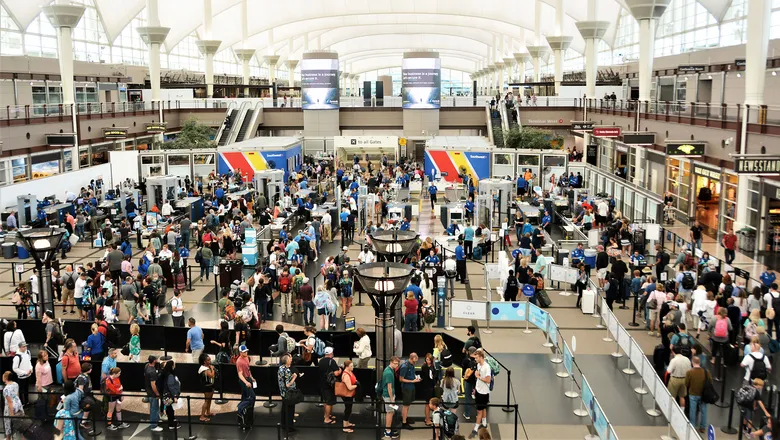

# Flights Delay

Flights Delays cost thousands of dollars every day, for the airlines and passengers.

The following dataset contains 1936758 flights in United States in 2008, with their delays, cancelation code, or if them were diverted.

The aim is to find what are the reasons of the delays, and try to predict the delay.

The data was obteined from: https://www.kaggle.com/datasets/giovamata/airlinedelaycauses

<a name="https://www.kaggle.com/datasets/bulter22/airline-data?select=carriers.csv"></a>

# Table of Contents

- [Data Cleaning](#preprocessing)   
- [Exploratory Data Analysis](#eda)
- [Study Case](#studyCase)
- [Univariate and Bivariate Analysis](#uniAnalysis)
- [Modeling](#modeling)
- [Conclusion](#conclusion)
- [Appendix](#appendix)

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_predict 
from statsmodels.tsa.stattools import adfuller
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from skopt import BayesSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import neighbors

!pip install category_encoders
from category_encoders import BinaryEncoder

!pip install geopandas
import geopandas
pd.set_option('display.max_columns', None)
import plotly.io as pio
pio.renderers.default = "notebook"

import warnings
warnings.filterwarnings("ignore")

In [4]:
pip install kaleido

Note: you may need to restart the kernel to use updated packages.


In [2]:
df_delayed_flights = pd.read_csv("DelayedFlights.csv")
df_delayed_flights.head(10)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
5,6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0
6,10,2008,1,3,4,706.0,700,916.0,915,WN,100,N690SW,130.0,135.0,106.0,1.0,6.0,IND,MCO,828,5.0,19.0,0,N,0,NaN,NaN,NaN,NaN,NaN
7,11,2008,1,3,4,1644.0,1510,1845.0,1725,WN,1333,N334SW,121.0,135.0,107.0,80.0,94.0,IND,MCO,828,6.0,8.0,0,N,0,8.0,0.0,0.0,0.0,72.0
8,15,2008,1,3,4,1029.0,1020,1021.0,1010,WN,2272,N263WN,52.0,50.0,37.0,11.0,9.0,IND,MDW,162,6.0,9.0,0,N,0,NaN,NaN,NaN,NaN,NaN
9,16,2008,1,3,4,1452.0,1425,1640.0,1625,WN,675,N286WN,228.0,240.0,213.0,15.0,27.0,IND,PHX,1489,7.0,8.0,0,N,0,3.0,0.0,0.0,0.0,12.0


In [3]:
df_delayed_flights.shape

(1936758, 30)

We have 1936758 flights and 30 features.

The features are the following:
- Year: Year of the flight
- Month: Month of the flight
- DayofMonth: Day of the month (1 - 31)
- DayOfWeek: Day of the week. 1 (Monday) - 7 (Sunday)
- DepTime: Actual departure time (hhmm)
- CRSDepTime: Scheduled Departure Time (hhmm)
- ArrTime: Actual Arrival Time (hhmm)
- CRSArrTime: Scheduled Arrival Time (hhmm)
- UniqueCarrier: Carrier Code
- FlightNum: Flight Number
- TailNum: Unique Aircraft Identifier
- ActualElapsedTime: Actual elapsed time of the flight
- CRSElapsedTime: Scheduled elapsed time of the flight
- AirTime: Airborne time for the flight
- ArrDelay: Arrival Delay. A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers.
- DepDelay: Departure Delay
- Origin: Originating IATA airport code
- Dest: Destination IATA airport code
- Distance: Flight distance, in miles
- TaxiIn: Taxi time from wheels down to arrival at the gate
- TaxiOut: taxi time from departure from the gate to wheels up
- Cancelled: Was the flight cancelled
- CancellationCode: Reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
- Diverted: 1 = yes, 0 = no
- CarrierDelay: Delay attributable to the carrier
- WeatherDelay: Delay attributable to weather factors
- NASDelay: Delay attributable to the National Aviation System
- SecurityDelay: Delay attributable to security factors
- LateAircraftDelay: delay attributable to late-arriving aircraft 

## Data Cleaning<a name="dataCleaning"></a>

In [4]:
df_delayed_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

### Missing Values<a name="missingValues"></a>

In [5]:
df_delayed_flights.isnull().sum()

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

We have some features with nan, let's take a look at them.

#### ActualElapsedTime, AirTime and AirDelay

In these features we have 8387 missing values.

In [6]:
df_delayed_flights[df_delayed_flights["ArrDelay"].isnull() == True]

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1280,1763,2008,1,3,4,922.0,915,NaN,1050,WN,1069,N630WN,NaN,95.0,NaN,NaN,7.0,SAN,SMF,480,NaN,12.0,0,N,1,NaN,NaN,NaN,NaN,NaN
1372,1911,2008,1,3,4,2325.0,1900,NaN,2030,WN,2092,N302SW,NaN,90.0,NaN,NaN,265.0,SFO,SAN,447,NaN,11.0,0,N,1,NaN,NaN,NaN,NaN,NaN
1776,2651,2008,1,4,5,1949.0,1905,NaN,1910,WN,1403,N504SW,NaN,65.0,NaN,NaN,44.0,BOI,RNO,335,NaN,11.0,0,N,1,NaN,NaN,NaN,NaN,NaN
1831,2726,2008,1,4,5,737.0,705,NaN,825,WN,178,N718SW,NaN,80.0,NaN,NaN,32.0,BUR,SMF,358,NaN,13.0,0,N,1,NaN,NaN,NaN,NaN,NaN
2244,3672,2008,1,4,5,1849.0,1630,NaN,1755,WN,239,N636WN,NaN,85.0,NaN,NaN,139.0,LAS,RNO,345,NaN,12.0,0,N,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935651,7006289,2008,12,10,3,1459.0,1447,NaN,1650,DL,1706,N914DN,NaN,123.0,NaN,NaN,12.0,ATL,BUF,712,NaN,37.0,1,A,0,NaN,NaN,NaN,NaN,NaN
1935716,7006401,2008,12,11,4,1355.0,1106,7.0,1950,DL,26,N3747D,NaN,344.0,NaN,NaN,169.0,LAX,JFK,2475,13.0,17.0,0,N,1,NaN,NaN,NaN,NaN,NaN
1935876,7006809,2008,12,11,4,1026.0,955,NaN,1219,DL,892,N928DL,NaN,144.0,NaN,NaN,31.0,ATL,JFK,760,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
1935978,7007034,2008,12,11,4,1527.0,1520,2106.0,1708,DL,1102,N924DL,NaN,108.0,NaN,NaN,7.0,IAD,ATL,533,9.0,19.0,0,N,1,NaN,NaN,NaN,NaN,NaN


We see that in these cases, the flight was Diverted or Cancelled.

In [7]:
df_delayed_flights['Diverted'][((df_delayed_flights['Diverted'] == 1) | (df_delayed_flights['Cancelled'] == 1))].count()

8387

So, I will set ArrDelay missing values with zero.

In [8]:
df_delayed_flights.fillna({'ArrDelay':0}, inplace=True)
df_delayed_flights.fillna({'ActualElapsedTime':0}, inplace=True)
df_delayed_flights.fillna({'AirTime':0}, inplace=True)

#### CarrierDelay, WeatherDelay, NASDelay, SecurityDelay and LateAircraftDelay

All these features have 689270 missing values.

In [9]:
df_delayed_flights[((df_delayed_flights["CarrierDelay"].isnull() == True) & 
                   (df_delayed_flights["WeatherDelay"].isnull() == True) & 
                   (df_delayed_flights["NASDelay"].isnull() == True) & 
                   (df_delayed_flights["SecurityDelay"].isnull() == True) & 
                   (df_delayed_flights["LateAircraftDelay"].isnull() == True))]

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
6,10,2008,1,3,4,706.0,700,916.0,915,WN,100,N690SW,130.0,135.0,106.0,1.0,6.0,IND,MCO,828,5.0,19.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936739,7009646,2008,12,13,6,1100.0,1045,1350.0,1347,DL,1530,N920DL,110.0,122.0,91.0,3.0,15.0,MCI,ATL,692,7.0,12.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1936740,7009652,2008,12,13,6,1200.0,1150,1924.0,1921,DL,1538,N6710E,264.0,271.0,238.0,3.0,10.0,PDX,ATL,2172,11.0,15.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1936750,7009702,2008,12,13,6,1531.0,1522,1822.0,1823,DL,1612,N916DN,111.0,121.0,88.0,-1.0,9.0,MCI,ATL,692,9.0,14.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [10]:
df_delayed_flights[((df_delayed_flights["CarrierDelay"].isnull() == True) & 
                   (df_delayed_flights["WeatherDelay"].isnull() == True) & 
                   (df_delayed_flights["NASDelay"].isnull() == True) & 
                   (df_delayed_flights["SecurityDelay"].isnull() == True) & 
                   (df_delayed_flights["LateAircraftDelay"].isnull() == True))]["ArrDelay"].describe()

count    689270.000000
mean          3.513878
std           7.798495
min        -109.000000
25%          -1.000000
50%           5.000000
75%          10.000000
max          14.000000
Name: ArrDelay, dtype: float64

For this case, we can see that the max time of Arrive Delay is 14, and seems that flights with delay les than 15 minutes, there are not values in the delay types. I will consider them as "on time" flights and I will set these missing values with 0.

In [11]:
df_delayed_flights.fillna({'CarrierDelay':0}, inplace=True)
df_delayed_flights.fillna({'WeatherDelay':0}, inplace=True)
df_delayed_flights.fillna({'NASDelay':0}, inplace=True)
df_delayed_flights.fillna({'SecurityDelay':0}, inplace=True)
df_delayed_flights.fillna({'LateAircraftDelay':0}, inplace=True)

#### TaxiIn and ArrTime

In [12]:
df_delayed_flights[(df_delayed_flights["TaxiIn"].isnull() == True) & 
                   (df_delayed_flights["ArrTime"].isnull() == True)]

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1280,1763,2008,1,3,4,922.0,915,NaN,1050,WN,1069,N630WN,0.0,95.0,0.0,0.0,7.0,SAN,SMF,480,NaN,12.0,0,N,1,0.0,0.0,0.0,0.0,0.0
1372,1911,2008,1,3,4,2325.0,1900,NaN,2030,WN,2092,N302SW,0.0,90.0,0.0,0.0,265.0,SFO,SAN,447,NaN,11.0,0,N,1,0.0,0.0,0.0,0.0,0.0
1776,2651,2008,1,4,5,1949.0,1905,NaN,1910,WN,1403,N504SW,0.0,65.0,0.0,0.0,44.0,BOI,RNO,335,NaN,11.0,0,N,1,0.0,0.0,0.0,0.0,0.0
1831,2726,2008,1,4,5,737.0,705,NaN,825,WN,178,N718SW,0.0,80.0,0.0,0.0,32.0,BUR,SMF,358,NaN,13.0,0,N,1,0.0,0.0,0.0,0.0,0.0
2244,3672,2008,1,4,5,1849.0,1630,NaN,1755,WN,239,N636WN,0.0,85.0,0.0,0.0,139.0,LAS,RNO,345,NaN,12.0,0,N,1,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934590,7002526,2008,12,7,7,1526.0,1444,NaN,1654,DL,1743,N958DL,0.0,130.0,0.0,0.0,42.0,BUF,ATL,712,NaN,NaN,1,A,0,0.0,0.0,0.0,0.0,0.0
1935491,7006018,2008,12,10,3,1431.0,1422,NaN,1527,DL,1405,N906DL,0.0,125.0,0.0,0.0,9.0,ATL,IAH,689,NaN,NaN,1,C,0,0.0,0.0,0.0,0.0,0.0
1935651,7006289,2008,12,10,3,1459.0,1447,NaN,1650,DL,1706,N914DN,0.0,123.0,0.0,0.0,12.0,ATL,BUF,712,NaN,37.0,1,A,0,0.0,0.0,0.0,0.0,0.0
1935876,7006809,2008,12,11,4,1026.0,955,NaN,1219,DL,892,N928DL,0.0,144.0,0.0,0.0,31.0,ATL,JFK,760,NaN,NaN,1,A,0,0.0,0.0,0.0,0.0,0.0


We have missing values here because the flight was cancelled or diverted, so I will set them with 0.

In [13]:
df_delayed_flights.fillna({'ArrTime':0}, inplace=True)
df_delayed_flights.fillna({'TaxiIn':0}, inplace=True)

#### TaxiOut

In [14]:
df_delayed_flights[(df_delayed_flights["TaxiOut"].isnull() == True)]

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1546593,5484245,2008,10,25,6,1323.0,1255,0.0,1442,XE,2347,N26549,0.0,107.0,0.0,0.0,28.0,CLT,EWR,529,0.0,NaN,1,B,0,0.0,0.0,0.0,0.0,0.0
1547161,5486876,2008,10,22,3,1825.0,1815,0.0,1927,XE,2819,N12946,0.0,72.0,0.0,0.0,10.0,JAN,IAH,351,0.0,NaN,1,C,0,0.0,0.0,0.0,0.0,0.0
1547178,5486924,2008,10,22,3,1733.0,1715,0.0,1818,XE,2890,N16944,0.0,63.0,0.0,0.0,18.0,IAH,BTR,253,0.0,NaN,1,B,0,0.0,0.0,0.0,0.0,0.0
1548271,5491819,2008,10,15,3,1943.0,1745,0.0,1857,XE,2117,N26545,0.0,72.0,0.0,0.0,118.0,IAH,HRL,295,0.0,NaN,1,B,0,0.0,0.0,0.0,0.0,0.0
1548430,5492348,2008,10,15,3,1610.0,1600,0.0,1738,XE,2920,N14558,0.0,98.0,0.0,0.0,10.0,IAH,MEM,469,0.0,NaN,1,B,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931769,6993003,2008,12,2,2,847.0,740,0.0,1540,CO,1580,N17229,0.0,300.0,0.0,0.0,67.0,SEA,EWR,2401,0.0,NaN,1,A,0,0.0,0.0,0.0,0.0,0.0
1933249,6996086,2008,12,2,2,750.0,730,0.0,851,DL,1342,N915DE,0.0,81.0,0.0,0.0,20.0,DCA,LGA,214,0.0,NaN,1,A,0,0.0,0.0,0.0,0.0,0.0
1934590,7002526,2008,12,7,7,1526.0,1444,0.0,1654,DL,1743,N958DL,0.0,130.0,0.0,0.0,42.0,BUF,ATL,712,0.0,NaN,1,A,0,0.0,0.0,0.0,0.0,0.0
1935491,7006018,2008,12,10,3,1431.0,1422,0.0,1527,DL,1405,N906DL,0.0,125.0,0.0,0.0,9.0,ATL,IAH,689,0.0,NaN,1,C,0,0.0,0.0,0.0,0.0,0.0


In [15]:
df_delayed_flights[(df_delayed_flights["TaxiOut"].isnull() == True) & (df_delayed_flights["Cancelled"] == 1)].count()

Unnamed: 0           455
Year                 455
Month                455
DayofMonth           455
DayOfWeek            455
DepTime              455
CRSDepTime           455
ArrTime              455
CRSArrTime           455
UniqueCarrier        455
FlightNum            455
TailNum              455
ActualElapsedTime    455
CRSElapsedTime       455
AirTime              455
ArrDelay             455
DepDelay             455
Origin               455
Dest                 455
Distance             455
TaxiIn               455
TaxiOut                0
Cancelled            455
CancellationCode     455
Diverted             455
CarrierDelay         455
WeatherDelay         455
NASDelay             455
SecurityDelay        455
LateAircraftDelay    455
dtype: int64

We have missing values here because the flight was cancelled, so I will set them with 0.

In [16]:
df_delayed_flights.fillna({'TaxiOut':0}, inplace=True)

#### CRSElapsedTime

In [17]:
df_delayed_flights[(df_delayed_flights["CRSElapsedTime"].isnull() == True)]

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
138532,454268,2008,1,31,4,745.0,715,0.0,941,9E,2001,91469E,0.0,NaN,0.0,0.0,30.0,ATL,AUS,813,0.0,15.0,0,N,1,0.0,0.0,0.0,0.0,0.0
138574,454394,2008,1,10,4,1920.0,1830,0.0,2102,9E,2004,91539E,0.0,NaN,0.0,0.0,50.0,IAH,MEM,469,0.0,20.0,0,N,1,0.0,0.0,0.0,0.0,0.0
138697,454781,2008,1,7,1,1130.0,1115,0.0,2400,9E,2807,89309E,0.0,NaN,0.0,0.0,15.0,MSP,CID,221,0.0,15.0,0,N,1,0.0,0.0,0.0,0.0,0.0
138786,455112,2008,1,5,6,916.0,805,0.0,2400,9E,2825,80239E,0.0,NaN,0.0,0.0,71.0,IDA,MSP,939,0.0,12.0,0,N,1,0.0,0.0,0.0,0.0,0.0
138946,455680,2008,1,17,4,1947.0,1910,0.0,2400,9E,2860,89869E,0.0,NaN,0.0,0.0,37.0,MSP,TVC,375,0.0,32.0,0,N,1,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501260,5261137,2008,9,14,7,1018.0,1010,0.0,2400,9E,5690,89289E,0.0,NaN,0.0,0.0,8.0,MSP,SDF,603,0.0,26.0,0,N,1,0.0,0.0,0.0,0.0,0.0
1501426,5263197,2008,9,28,7,1953.0,1945,0.0,2400,9E,5739,87189E,0.0,NaN,0.0,0.0,8.0,MEM,CHA,271,0.0,12.0,0,N,1,0.0,0.0,0.0,0.0,0.0
1501463,5263753,2008,9,26,5,1447.0,1440,0.0,2400,9E,5760,84929E,0.0,NaN,0.0,0.0,7.0,MEM,CHA,271,0.0,18.0,0,N,1,0.0,0.0,0.0,0.0,0.0
1501786,5267103,2008,9,11,4,612.0,600,0.0,2400,9E,5864,86889E,0.0,NaN,0.0,0.0,12.0,OMA,DTW,651,0.0,19.0,0,N,1,0.0,0.0,0.0,0.0,0.0


In [18]:
df_delayed_flights[(df_delayed_flights["CRSElapsedTime"].isnull() == True) & (df_delayed_flights["Diverted"] == 1)].count()

Unnamed: 0           198
Year                 198
Month                198
DayofMonth           198
DayOfWeek            198
DepTime              198
CRSDepTime           198
ArrTime              198
CRSArrTime           198
UniqueCarrier        198
FlightNum            198
TailNum              198
ActualElapsedTime    198
CRSElapsedTime         0
AirTime              198
ArrDelay             198
DepDelay             198
Origin               198
Dest                 198
Distance             198
TaxiIn               198
TaxiOut              198
Cancelled            198
CancellationCode     198
Diverted             198
CarrierDelay         198
WeatherDelay         198
NASDelay             198
SecurityDelay        198
LateAircraftDelay    198
dtype: int64

We have missing values here because the flight was Diverted, so I will set them with 0.

In [20]:
df_delayed_flights.fillna({'CRSElapsedTime':0}, inplace=True)

#### TailNum

In [21]:
df_delayed_flights[(df_delayed_flights["TailNum"].isnull() == True)]

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
433449,1339662,2008,3,21,5,1333.0,1320,0.0,1428,OH,5338,NaN,0.0,68.0,0.0,0.0,13.0,CVG,GRR,268,0.0,16.0,0,N,1,0.0,0.0,0.0,0.0,0.0
523748,1643793,2008,3,18,2,1716.0,1655,2036.0,1947,9E,3760,NaN,140.0,112.0,100.0,49.0,21.0,DSM,DTW,534,11.0,29.0,0,N,0,0.0,0.0,28.0,0.0,21.0
773772,2543429,2008,5,8,4,1545.0,1530,1711.0,1707,OH,5043,NaN,86.0,97.0,66.0,4.0,15.0,CVG,CHS,497,5.0,15.0,0,N,0,0.0,0.0,0.0,0.0,0.0
776480,2556354,2008,5,31,6,1720.0,1244,1920.0,1427,OH,5396,NaN,120.0,103.0,72.0,293.0,276.0,RDU,JFK,426,8.0,40.0,0,N,0,0.0,276.0,17.0,0.0,0.0
1309410,4387673,2008,8,2,6,1840.0,1305,0.0,1438,OH,5731,NaN,0.0,93.0,0.0,0.0,335.0,RDU,ATL,356,0.0,6.0,0,N,1,0.0,0.0,0.0,0.0,0.0


As we have only just 5 records, I can remove them.

In [22]:
df_delayed_flights.dropna(inplace=True)

## Exploratory Data Analysis<a name="eda"></a>

In order to start the Exploratory Data Analysis, let's see how many flights have in each airline.

Before that, I will read a dataset that contains the names of airlines in order to show the plots with their names.

In [23]:
airlines = pd.read_csv("carriers.csv")

In [24]:
df_delayed_flights = pd.merge(df_delayed_flights, airlines, left_on='UniqueCarrier', right_on='Code')
df_delayed_flights = df_delayed_flights.rename(columns={"Description": "CarrierName"})
df_delayed_flights = df_delayed_flights.drop('Code', axis=1)

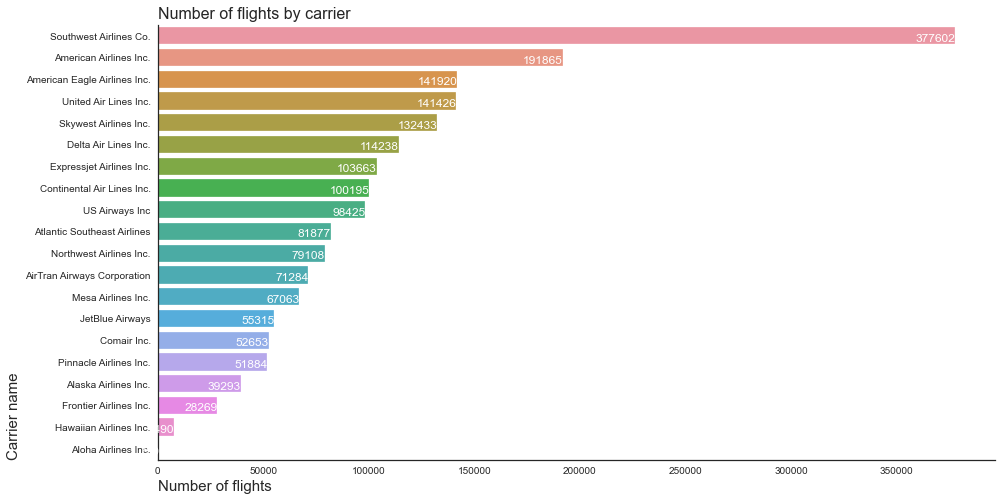

In [25]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15, 8))
airlines_with_delay_count = sns.countplot(y="CarrierName", data=df_delayed_flights,
                                            order=df_delayed_flights['CarrierName'].value_counts().index,
                                            orient ="b")

for p in airlines_with_delay_count.patches:
    airlines_with_delay_count.annotate(f'{int(p.get_width())}', 
                                     (p.get_x() + p.get_width() - 0.3, p.get_y() + p.get_height()- 0.05),
                ha='right', va='center', fontsize=12, color='white', xytext=(0, 5),
                textcoords='offset points')
    
airlines_with_delay_count.set_title('Number of flights by carrier', fontsize=16, loc="left")
airlines_with_delay_count.set_xlabel('Number of flights', fontsize=15, loc="left")
_ = airlines_with_delay_count.set_ylabel('Carrier name', fontsize=15, loc="bottom")
sns.despine()

The airline with the most number of flights with high difference is Southwest Airlines with 377602 flights, it is the world's largest low-cost carrier. And the airline with the least number of flights is Aloha Airlines, headquartered in Honolulu, Hawaii. I have to mention that this airline ceased their operations on March 31, 2008, so we have few flights due to that.

The second carrier with the least number of flights is Hawaiian Airlines, another airline from Hawaii, it is the largest operator of commercial flights to and from the U.S. state of Hawaii. Seems that there are not too many flighs connected to Hawaii.

Let's observe now the number of delayed flights (with arrive delay more than 15) per carrier.

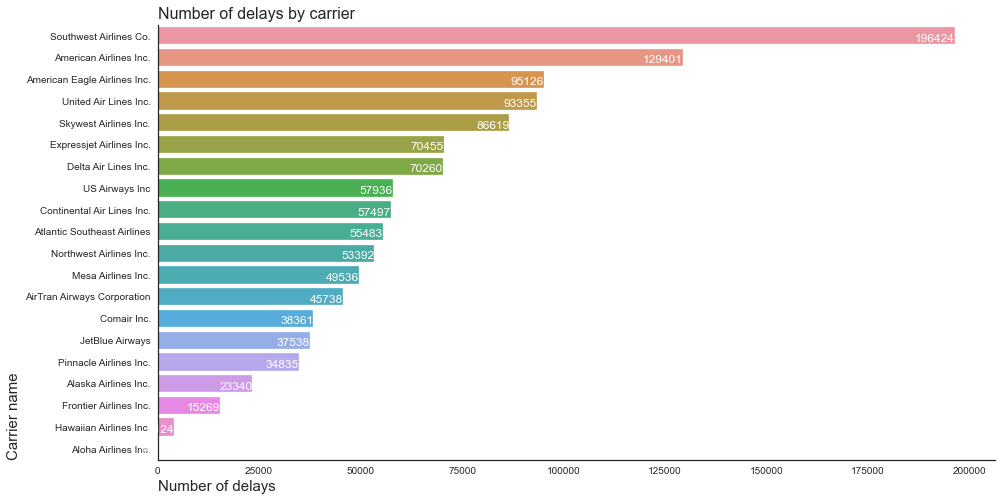

In [26]:
sns.set_style("ticks")
df_airlines_with_delay = df_delayed_flights[df_delayed_flights['ArrDelay'] > 15]
fig, ax = plt.subplots(figsize=(15, 8))
airlines_with_delay_count = sns.countplot(y="CarrierName", data=df_airlines_with_delay,
                                            order=df_airlines_with_delay['CarrierName'].value_counts().index,
                                            orient ="b")
for p in airlines_with_delay_count.patches:
    airlines_with_delay_count.annotate(f'{int(p.get_width())}', 
                                     (p.get_x() + p.get_width() - 0.3, p.get_y() + p.get_height()- 0.05),
                ha='right', va='center', fontsize=12, color='white', xytext=(0, 5),
                textcoords='offset points')
    
airlines_with_delay_count.set_title('Number of delays by carrier', fontsize = 16, loc="left")
airlines_with_delay_count.set_xlabel('Number of delays', fontsize = 15, loc="left")
airlines_with_delay_count.set_ylabel('Carrier name', fontsize = 15, loc="bottom")
sns.despine()

The airline with most delays is Southwest Airline, with 196424. And the second one is American Airlines with 129401.

Which percentage represents that number of delays per carrier?

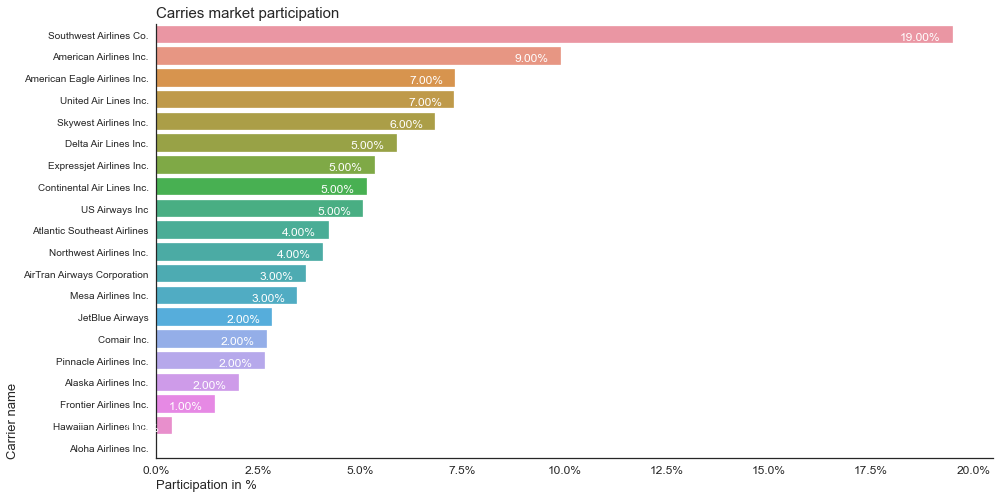

In [27]:
sns.set_style("ticks")
total_flights = len(df_delayed_flights)
fig, ax = plt.subplots(figsize=(15, 8))
carries_counts = df_delayed_flights['CarrierName'].value_counts()
market_participation = (carries_counts / total_flights) * 100

market_participation_plot = sns.barplot(y=market_participation.index, x=market_participation.values, orient="h")

for p in market_participation_plot.patches:
    market_participation_plot.annotate(f'{int(p.get_width()):.2f}%', 
                                     (p.get_x() + p.get_width() - 0.3, p.get_y() + p.get_height()- 0.05),
                ha='right', va='center', fontsize=12, color='white', xytext=(0, 5),
                textcoords='offset points')
    
market_participation_plot.set_title('Carries market participation', fontsize = 15, loc="left")
market_participation_plot.set_ylabel('Carrier name', fontsize = 13, loc="bottom")
market_participation_plot.set_xlabel('Participation in %', fontsize = 13, loc="left")
existing_labels = market_participation_plot.get_xticks()

new_labels = [f"{label:.1f}%" for label in existing_labels]
market_participation_plot.set_xticklabels(new_labels, fontsize=12)
sns.despine()

We can see that the 19% of the delayed flights belong to Southwest Airlines, and the 9% belong to American Airlines.

The low cost airlines have become very popular last years due to high emphasis on minimizing operating costs and without some of the traditional services and amenities provided in the fare, resulting in lower fares and fewer comforts.

---------------------------------------

Let's see now how many flights are in each month.

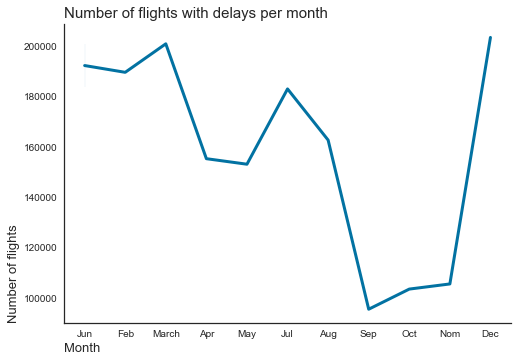

In [28]:
sns.set_style("ticks")
df_flights_per_month = df_delayed_flights.rename(columns={"Year": "Count"}).groupby("Month")["Count"].count().reset_index()
months = ["Jun", "Feb", "March", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nom", "Dec"]
df_flights_per_month["Month"] = months
flights_per_month_plot = sns.lineplot(x="Month", y="Count", data=df_flights_per_month, linewidth=3)
flights_per_month_plot.set_title('Number of flights with delays per month', fontsize = 15, loc="left")
flights_per_month_plot.set_ylabel('Number of flights', fontsize = 13, loc="bottom")
flights_per_month_plot.set_xlabel('Month', fontsize = 13, loc="left")
sns.despine()

From above we can say that we have more flights with delays in March, Jun (close to summer holidays), and in November and December, during thanksgiving and christmas. In these months we have the double of flights than in September and October.

Also we can observe that in September, October and the beginning of November we have the half of delays than in December and March.

Let's see now the flights during the week.

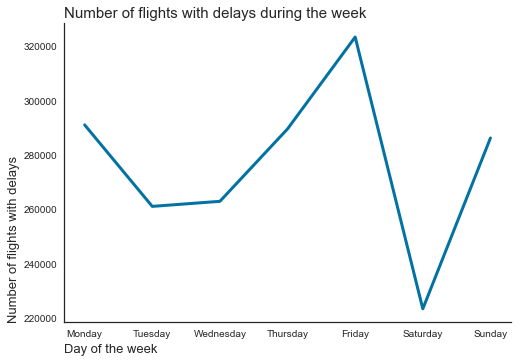

In [29]:
df_flights_per_day_week = df_delayed_flights.rename(columns={"Year": "Count"}
                                                   ).groupby("DayOfWeek")["Count"].count().reset_index()
days_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_flights_per_day_week["DayOfWeek"] = days_week
flights_per_day_week_plot = sns.lineplot(x="DayOfWeek", y="Count", data=df_flights_per_day_week, linewidth=3)
flights_per_day_week_plot.set_title('Number of flights with delays during the week', fontsize = 15, loc="left")
flights_per_day_week_plot.set_ylabel('Number of flights with delays', fontsize = 13, loc="bottom")
flights_per_day_week_plot.set_xlabel('Day of the week', fontsize = 13, loc="left")
sns.despine()

During the week, we can see more flights with delays close to the begining of the weekend, with a peak on Friday, and another peak in the end of the weekend, on Sunday. We see also very very few number of flights with delays on Saturday.

Let's see now the flights during the week per airline.

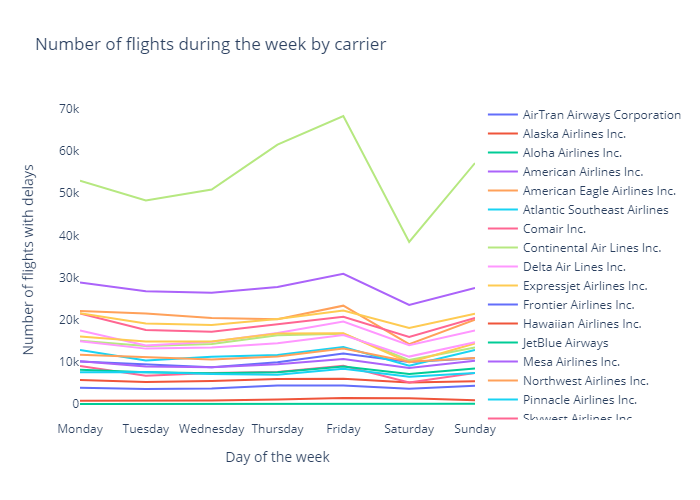

In [30]:
days_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
def set_day_of_week_name(col):
    return days_week[int(col["DayOfWeek"]) -1]

df_flights_week_per_carrier = df_delayed_flights.groupby(["CarrierName", "DayOfWeek"]).count().reset_index()
df_flights_week_per_carrier["DayOfWeek"] = df_flights_week_per_carrier.apply(set_day_of_week_name, axis=1)
fig = go.Figure()

for carrier in df_flights_week_per_carrier['CarrierName'].unique():
    carrier_data = df_flights_week_per_carrier[df_flights_week_per_carrier['CarrierName'] == carrier]
    fig.add_trace(go.Scatter(
        x=carrier_data['DayOfWeek'],
        y=carrier_data['Month'],
        mode='lines',
        #fill='tozeroy',
        name=f'{carrier}'
    ))

fig.update_yaxes(title_text='Number of flights with delays')
fig.update_xaxes(title_text='Day of the week')
fig.update_layout(title='Number of flights during the week by carrier')
fig.update_layout(plot_bgcolor='rgba(0, 0, 0, 0)',paper_bgcolor='rgba(0, 0, 0, 0)')
fig.show("png")

It looks like a spaghetti, but we can see that most of the carriers follow the same frequency, with their peaks on Friday and Sunday, and Southwest Airlines leading the number of flights.

--------------------------------------

What about the types of delays? We Have 5 types delays: 
- CarrierDelay: Describe a delay that is within the airline's control and is caused by factors such as maintenance issues, crew scheduling problems, or other operational issues directly related to the airline.
- WeatherDelay: Describe a delay due to the weather.
- NASDelay: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control.
- SecurityDelay: It is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach
- LateAircraftDelay: It is due to the late arrival of the same aircraft at a previous airport.

Let's see for each carrier the percentage of each delay. For that, I will count the the number of times that each carrie has each delay type.

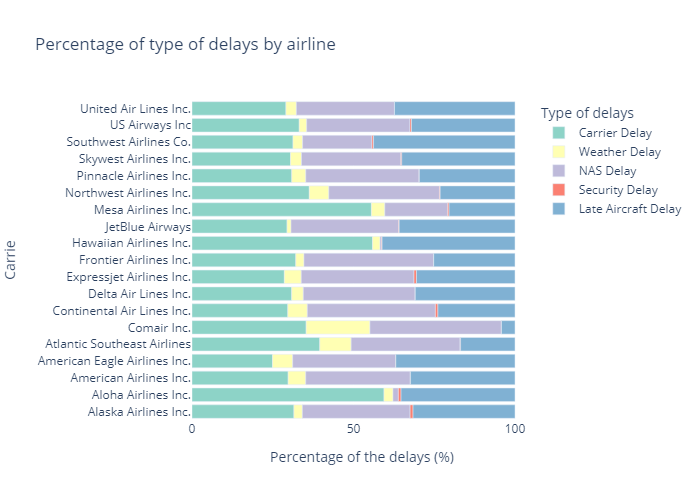

In [31]:
# Calculate the number of each delay of each airline
carrier_delay_per_carrier = df_delayed_flights[df_delayed_flights['CarrierDelay'] > 0].groupby(
    "CarrierName")["CarrierDelay"].count()
carrier_delay_per_carrier = carrier_delay_per_carrier.reset_index()

weather_delay_per_carrier = df_delayed_flights[df_delayed_flights['WeatherDelay'] > 0].groupby(
    "CarrierName")["WeatherDelay"].count()
weather_delay_per_carrier = weather_delay_per_carrier.reset_index()

nas_delay_per_carrier = df_delayed_flights[df_delayed_flights['NASDelay'] > 0].groupby(
    "CarrierName")["NASDelay"].count()
nas_delay_per_carrier = nas_delay_per_carrier.reset_index()

security_delay_per_carrier = df_delayed_flights[df_delayed_flights['SecurityDelay'] > 0].groupby(
    "CarrierName")["SecurityDelay"].count()
security_delay_per_carrier = security_delay_per_carrier.reset_index()

late_aircraft_delay_per_carrier = df_delayed_flights[df_delayed_flights['LateAircraftDelay'] > 0].groupby(
    "CarrierName")["LateAircraftDelay"].count()
late_aircraft_delay_per_carrier = late_aircraft_delay_per_carrier.reset_index()

# merge all to the same dataframe
df_carrier_delays = pd.merge(carrier_delay_per_carrier, weather_delay_per_carrier, left_on='CarrierName', 
                             right_on='CarrierName')
df_carrier_delays = pd.merge(df_carrier_delays, nas_delay_per_carrier, left_on='CarrierName', right_on='CarrierName')
df_carrier_delays = pd.merge(df_carrier_delays, security_delay_per_carrier, left_on='CarrierName', 
                             right_on='CarrierName')
df_carrier_delays = pd.merge(df_carrier_delays, late_aircraft_delay_per_carrier, left_on='CarrierName', 
                             right_on='CarrierName')

df_carrier_delays['TotalDelays'] = df_carrier_delays[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 
                                                      'LateAircraftDelay']].sum(axis=1)

# calculate percentage
delay_columns_per = []
delay_columns = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
for column in delay_columns:
    df_carrier_delays[column + '_Percentage'] = (df_carrier_delays[column] / df_carrier_delays['TotalDelays']) * 100
    delay_columns_per.append(column + '_Percentage')
    
fig = px.bar(df_carrier_delays, x=delay_columns_per, y='CarrierName', title='Percentage of type of delays by airline',
             color_discrete_sequence=px.colors.qualitative.Set3, orientation='h')

legend_labels = ['Carrier Delay', 'Weather Delay', 'NAS Delay', 'Security Delay', 'Late Aircraft Delay']
fig.update_layout(legend_title_text='Type of delays')
fig.update_yaxes(title_text='Carrie')
fig.update_xaxes(title_text='Percentage of the delays (%)')
for i, label in enumerate(legend_labels):
    fig.data[i].name = label

fig.update_layout(plot_bgcolor='rgba(0, 0, 0, 0)', paper_bgcolor='rgba(0, 0, 0, 0)')
fig.show("png")

We see three airlines with high percentage, more than 55%, of Carrier Delay. These are Aloha Airlines, Hawaiian Airlines and Mesa Airlines. Aloha and Hawaiian Airlines have few flights, and most of them connect Hawaii Islands to all the states. Due to that, scheduling flight crews for operations to and from Hawaii could contribute to carrier delays. These Airlines also have a very few percentage of NAS Delay, probably it is because the routes have low volume of traffic and air traffic congestion. However, them have high LateAircraft Delay.

The other airlines have almost the same percentage of NAS Delay and Carrier Delay.

Southwest Airlines has the highest value of Late Aircraft Delay. As this is the airline with the most number of flights, we should check the routes, and how they schedule their aircrafts and operations.

Let's check now how is the behavior of these delays during the year.

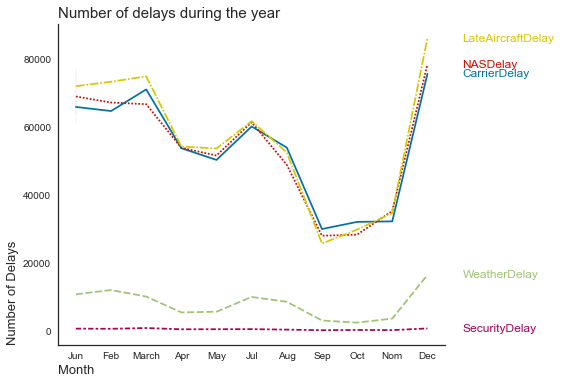

In [32]:
carrier_delay_count_per_month = df_delayed_flights[df_delayed_flights['CarrierDelay'] > 0
                                            ].groupby("Month")["CarrierDelay"].count()
carrier_delay_count_per_month = carrier_delay_count_per_month.reset_index()

weather_delay_count_per_month = df_delayed_flights[df_delayed_flights['WeatherDelay'] > 0
                                            ].groupby("Month")["WeatherDelay"].count()
weather_delay_count_per_month = weather_delay_count_per_month.reset_index()

nas_delay_count_per_month = df_delayed_flights[df_delayed_flights['NASDelay'] > 0
                                        ].groupby("Month")["NASDelay"].count()
nas_delay_count_per_month = nas_delay_count_per_month.reset_index()

security_delay_count_per_month = df_delayed_flights[df_delayed_flights['SecurityDelay'] > 0
                                             ].groupby("Month")["SecurityDelay"].count()
security_delay_count_per_month = security_delay_count_per_month.reset_index()

late_aircraft_delay_count_per_month = df_delayed_flights[df_delayed_flights['LateAircraftDelay'] > 0
                                                  ].groupby("Month")["LateAircraftDelay"].count()
late_aircraft_delay_count_per_month = late_aircraft_delay_count_per_month.reset_index()

df_delays_count = pd.merge(carrier_delay_count_per_month, weather_delay_count_per_month, left_on='Month', right_on='Month')
df_delays_count = pd.merge(df_delays_count, nas_delay_count_per_month, left_on='Month', right_on='Month')
df_delays_count = pd.merge(df_delays_count, security_delay_count_per_month, left_on='Month', right_on='Month')
df_delays_count = pd.merge(df_delays_count, late_aircraft_delay_count_per_month, left_on='Month', right_on='Month')
df_delays_count["Month"] = months
df_delays_count = df_delays_count.set_index("Month")

df_delays_count_plot = sns.lineplot(data=df_delays_count, legend=False)
for line, column in zip(df_delays_count_plot.lines, df_delays_count.columns):
    last_value = df_delays_count[column].iloc[-1]  # Get the last value in the column
    line_color = line.get_color()  # Get the line color from the legend
    plt.text(len(df_delays_count) - 1, last_value, column, ha='left', va='center', color=line_color)
    
df_delays_count_plot.set_title('Number of delays during the year', fontsize=15, loc="left")
df_delays_count_plot.set_ylabel('Number of Delays', fontsize=13, loc="bottom")
df_delays_count_plot.set_xlabel('Month', fontsize=13, loc="left")
plt.tight_layout()
sns.despine()

We observe that the number of CarrierDelay, NASDelay, LateAircraftDelay are related to the number of flights during the year,  we have the peaks in the same moments. We see more cases of CarrierDelay and LateAircraftDelay. So we can see that most of the flights with delays have this three delays.

From January to August, the number of Late Aircraft Delay is higher than Carrier Delay, then it changes and the number of CarrierDelay exceeds the number of Late Aircraft Delay. This happens in the same time that there are less number of flights with delays. Then, when the number of flights with delays increases, the number of Late Aircraft Delay is higher again.

The same with WeatherDelay, but with much less cases, we see more cases in winter.

There are not much cases of Security delay.

Now that we have the number of times of each type of delay, what if we check the mean of time of each delay?

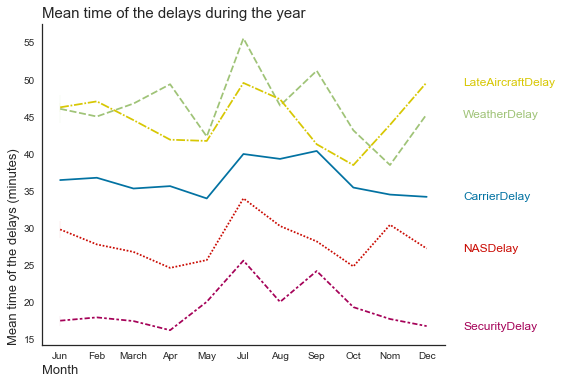

In [33]:
carrier_delay_mean_per_month = df_delayed_flights[df_delayed_flights['CarrierDelay'] > 0
                                            ].groupby("Month")["CarrierDelay"].mean()
carrier_delay_mean_per_month = carrier_delay_mean_per_month.reset_index()

weather_delay_mean_per_month = df_delayed_flights[df_delayed_flights['WeatherDelay'] > 0
                                            ].groupby("Month")["WeatherDelay"].mean()
weather_delay_mean_per_month = weather_delay_mean_per_month.reset_index()

nas_delay_mean_per_month = df_delayed_flights[df_delayed_flights['NASDelay'] > 0
                                        ].groupby("Month")["NASDelay"].mean()
nas_delay_mean_per_month = nas_delay_mean_per_month.reset_index()

security_delay_mean_per_month = df_delayed_flights[df_delayed_flights['SecurityDelay'] > 0
                                             ].groupby("Month")["SecurityDelay"].mean()
security_delay_mean_per_month = security_delay_mean_per_month.reset_index()

late_aircraft_mean_delay_per_month = df_delayed_flights[df_delayed_flights['LateAircraftDelay'] > 0
                                                  ].groupby("Month")["LateAircraftDelay"].mean()
late_aircraft_mean_delay_per_month = late_aircraft_mean_delay_per_month.reset_index()

df_delays_mean = pd.merge(carrier_delay_mean_per_month, weather_delay_mean_per_month, left_on='Month', right_on='Month')
df_delays_mean = pd.merge(df_delays_mean, nas_delay_mean_per_month, left_on='Month', right_on='Month')
df_delays_mean = pd.merge(df_delays_mean, security_delay_mean_per_month, left_on='Month', right_on='Month')
df_delays_mean = pd.merge(df_delays_mean, late_aircraft_mean_delay_per_month, left_on='Month', right_on='Month')
df_delays_mean["Month"] = months
df_delays_mean = df_delays_mean.set_index("Month")

df_delays_mean_plot = sns.lineplot(data=df_delays_mean, legend=False)
for line, column in zip(df_delays_mean_plot.lines, df_delays_mean.columns):
    last_value = df_delays_mean[column].iloc[-1]  # Get the last value in the column
    line_color = line.get_color()  # Get the line color from the legend
    plt.text(len(df_delays_mean) - 1, last_value, column, ha='left', va='center', color=line_color)
    
df_delays_mean_plot.set_title('Mean time of the delays during the year', fontsize = 15, loc="left")
df_delays_mean_plot.set_ylabel('Mean time of the delays (minutes)', fontsize = 13, loc="bottom")
df_delays_mean_plot.set_xlabel('Month', fontsize = 13, loc="left")
plt.tight_layout()
sns.despine()

At first we can see that the delays with more time are Weather, Carrier and Late Aircraft Delay.

We notice also that in May all the mean of all the delays increase and then decrease in August, in the same way that the number of flight does in the same period.

We can observe that in the last three months (Thanksgiving, Christmas and winter time) the Security, NAS and Carrier delays decrease, but the Weather and Late Aircraft delay increase.

--------------------------------------------

A flight could be On Time, Delayed, Diverted or Cancelled. Let's see number of each status.

In [34]:
def fligh_status(df):
    if(df["Cancelled"] == 1):
        return "Cancelled"
    if(df["Diverted"] == 1):
        return "Diverted"
    if(df["ArrDelay"] >= 15):
        return "Delayed" 
    return "OnTime"

df_delayed_flights["FlighStatus"] = df_delayed_flights.apply(fligh_status, axis=1)
df_delayed_flights["FlighStatus"].value_counts()

Delayed      1247486
OnTime        680882
Diverted        7752
Cancelled        633
Name: FlighStatus, dtype: int64

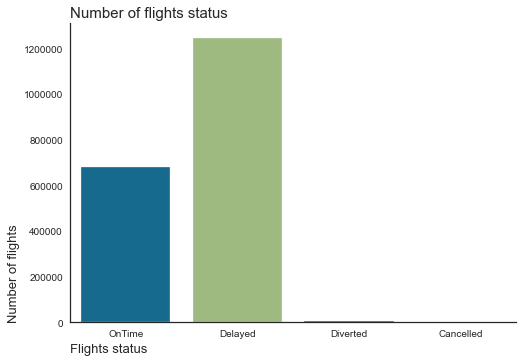

In [35]:
flights_status_count_plot = sns.countplot(x=df_delayed_flights["FlighStatus"])
plt.ticklabel_format(style='plain', axis='y')
sns.despine()
flights_status_count_plot.set_ylabel('Number of flights', fontsize = 13, loc="bottom")
flights_status_count_plot.set_xlabel('Flights status', fontsize = 13, loc="left")
_ = flights_status_count_plot.set_title('Number of flights status', fontsize = 15, loc="left")

Mos of the flights are Delayed, the double of the OnTime. And we have very few Diverted and Cancelled flights, just 7752 and 633 cases respectively.

Let's see the status per carrie.

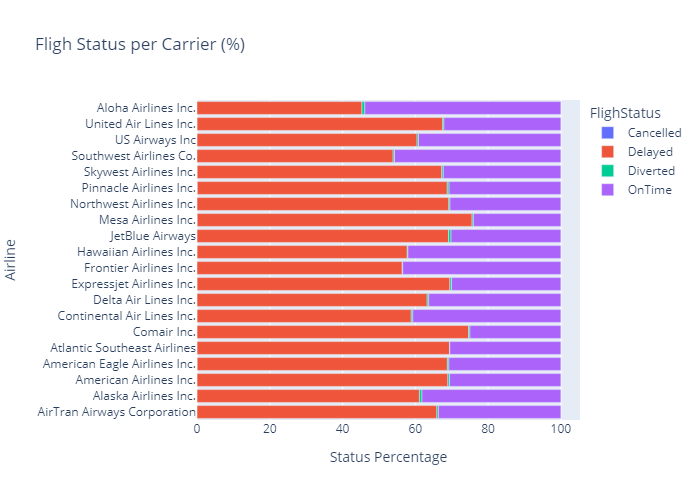

In [36]:
df_status_per_airline = df_delayed_flights.iloc[:, 0:].groupby(["CarrierName","FlighStatus"]).count()
df_status_per_airline = df_status_per_airline.rename(columns={"Year": "Percentage"})[["Percentage"]]
df_status_per_airline = df_status_per_airline.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
df_status_per_airline = df_status_per_airline.reset_index()

fig = px.bar(df_status_per_airline, y="CarrierName", x="Percentage", color="FlighStatus", 
             title="Fligh Status per Carrier (%)", orientation='h')

fig.update_yaxes(title_text='Airline')
fig.update_xaxes(title_text='Status Percentage')
fig.show("png")

Most of the airlines have more of the 50% of the flights delayed, except Aloha Airlines (AQ), but remember that this has few flights, 750, and ended their operations in March.

Southwest Airlines with 53.9 % of the flights delayed, is the airline with least percentage of delays. And with 45.72 % of flights OnTime, this is also the airline with the most flights on time.

There are few cancelled and diverted flights. Let's see the cancelled with more detail.

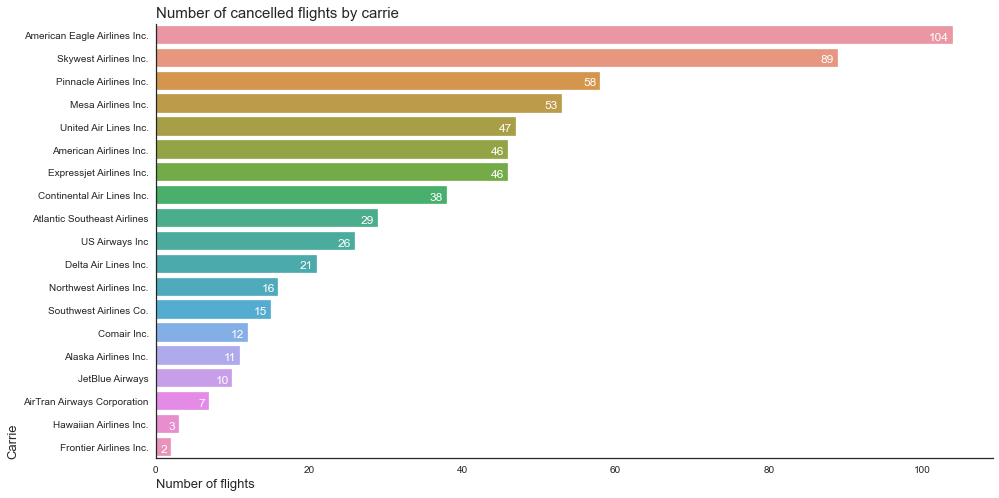

In [37]:
df_flights_cancelled = df_delayed_flights[df_delayed_flights['Cancelled'] == 1]
fig, ax = plt.subplots(figsize=(15, 8))
flights_cancelled_plot = sns.countplot(y = "CarrierName", data = df_flights_cancelled, orient ="b", 
                                      order=df_flights_cancelled['CarrierName'].value_counts().index)

flights_cancelled_plot.set_title('Number of cancelled flights by carrie', fontsize = 15, loc='left')
flights_cancelled_plot.set_ylabel('Carrie', fontsize = 13, loc="bottom")
flights_cancelled_plot.set_xlabel('Number of flights', fontsize=13, loc="left")
for p in flights_cancelled_plot.patches:
    ax.annotate(f'{p.get_width()}', (p.get_x() + p.get_width() - 0.5, p.get_y() + p.get_height()- 0.1),
                ha='right', va='center', fontsize=12, color='white', xytext=(0, 5),
                textcoords='offset points')
sns.despine()

American Eagle Airlines is the airline with most cancelled flights with 104 (out of 141920 total flights), and the next one is SkyWest Airlines with 89 (out of 100195).

Southwest Airlines, the airline with most number of flights, has few cancelled flights, just 15. American Airlines has more than them with 46.

We have 3 cancellation codes:
- A: Carrier
- B: Weather
- C: NAS

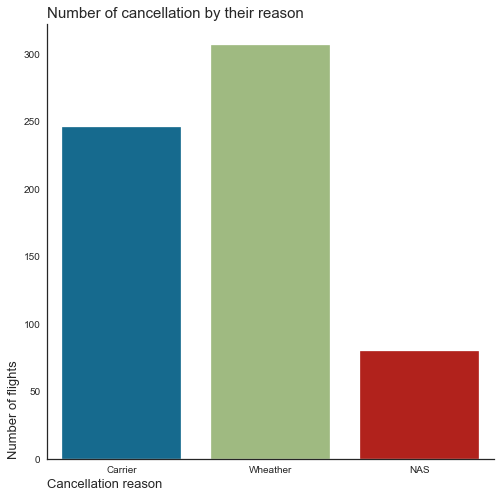

In [38]:
def set_cancellation_cod_desc(col):
    if col["CancellationCode"] == 'A':
        return "Carrier";
    elif col["CancellationCode"] == 'B':
        return "Wheather";
    return "NAS";

plt.figure(figsize=(8, 8))
df_flights_cancelled["CancellationCodeDesc"] = df_flights_cancelled.apply(set_cancellation_cod_desc, axis=1)
df_flights_cancelled_reason_plot = sns.countplot(x=df_flights_cancelled["CancellationCodeDesc"])
_ = df_flights_cancelled_reason_plot.set_title('Number of cancellation by their reason', fontsize = 15, loc='left')
df_flights_cancelled_reason_plot.set_ylabel('Number of flights', fontsize = 13, loc="bottom")
df_flights_cancelled_reason_plot.set_xlabel('Cancellation reason', fontsize = 13, loc="left")
sns.despine()

Most of the cancellations are due to the weather.

How are the cancellations during the year?

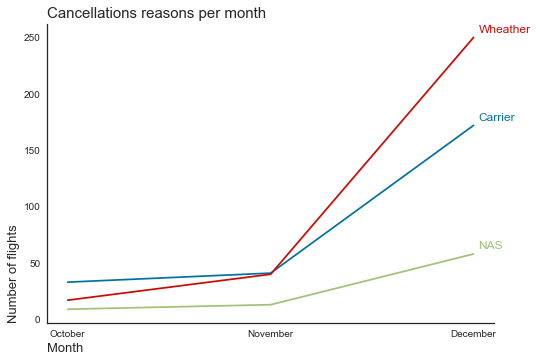

In [39]:
def set_months_for_cancellation(col):
    if col["Month"] == 10:
        return "October";
    elif col["Month"] == 11:
        return "November";
    return "December";

df_flights_cancelled_per_month = df_flights_cancelled.groupby(["Month", "CancellationCodeDesc"]).count().reset_index()
df_flights_cancelled_per_month["Month"] = df_flights_cancelled_per_month.apply(set_months_for_cancellation, axis=1)
flights_per_month_plot = sns.lineplot(x="Month", y="Year", hue="CancellationCodeDesc", data=df_flights_cancelled_per_month,
                                     legend=False)
for line, label in zip(flights_per_month_plot.lines, df_flights_cancelled_per_month['CancellationCodeDesc'].unique()):
    last_x = line.get_xdata()[-1]
    last_y = line.get_ydata()[-1]
    line_color = line.get_color()
    plt.annotate(label, (last_x, last_y), textcoords="offset points", xytext=(5, 5), ha='left', fontsize=12, 
                 color=line_color)

flights_per_month_plot.set_ylabel('Number of flights', fontsize = 13, loc="bottom")
flights_per_month_plot.set_xlabel('Month', fontsize = 13, loc="left")
_ = flights_per_month_plot.set_title('Cancellations reasons per month', fontsize=15, loc="left")
sns.despine()

We have cancellation only in the last quarter, where we can see how the cancellations due to the weather and carrie increase in December (winter and christmas time).

--------------------------------

What about the Diverted flights?

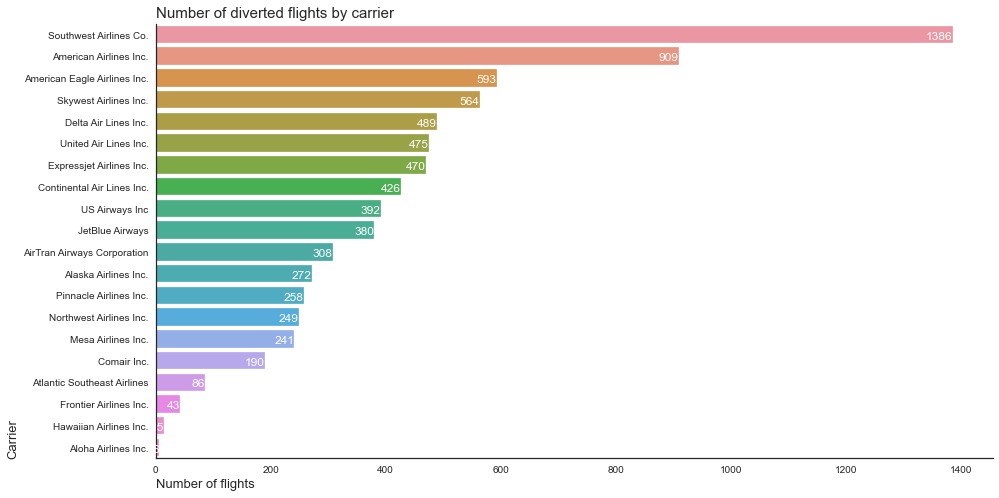

In [40]:
df_flights_diverted = df_delayed_flights[df_delayed_flights['Diverted'] == 1]
fig, ax = plt.subplots(figsize=(15, 8))
flights_diverted_plot = sns.countplot(y = "CarrierName", data = df_flights_diverted, orient ="b", 
                                      order=df_flights_diverted['CarrierName'].value_counts().index)
flights_diverted_plot.set_title('Number of diverted flights by carrier', fontsize = 15, loc='left')
flights_diverted_plot.set_ylabel('Carrier', fontsize = 13, loc="bottom")
flights_diverted_plot.set_xlabel('Number of flights', fontsize = 13, loc="left")

for p in flights_diverted_plot.patches:
    ax.annotate(f'{p.get_width()}', (p.get_x() + p.get_width() - 0.5, p.get_y() + p.get_height()- 0.1),
                ha='right', va='center', fontsize=12, color='white', xytext=(0, 5),
                textcoords='offset points')
sns.despine()

Contrary to the cancelled flights, Southwest Airlines is the airline with more diverted flights with 1386.

------------------------

We have seen that most of the carriers have Carrier and Late Aircraft Delays, let's check the number of routes, flights and aircrafts of each airline.

In [41]:
df_routes_per_airline = df_delayed_flights.groupby(["CarrierName", "Origin", "Dest"]).count().reset_index().groupby(
    "CarrierName").count().sort_values(by="TailNum", ascending=False).rename(columns={"TailNum": "Count"})
df_routes_per_airline = df_routes_per_airline.reset_index()
df_routes_per_airline[["CarrierName", "Count"]].head(5)

,CarrierName,Count
0,Skywest Airlines Inc.,912
1,Southwest Airlines Co.,896
2,Expressjet Airlines Inc.,629
3,Pinnacle Airlines Inc.,593
4,Comair Inc.,576


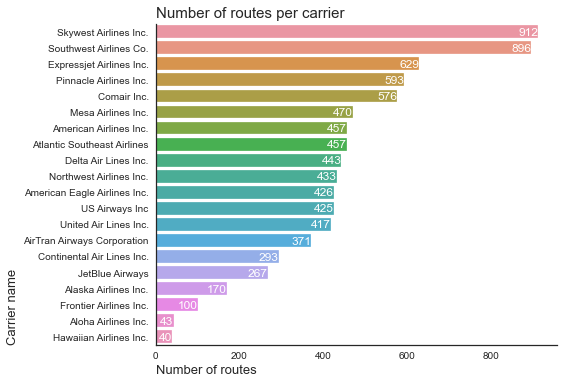

In [42]:
routes_per_airline_plot = sns.barplot(data=df_routes_per_airline, x="Count", y="CarrierName", orient="h")
routes_per_airline_plot.set_title('Number of routes per carrier', fontsize=15, loc='left' )
routes_per_airline_plot.set_ylabel('Carrier name', fontsize=13, loc="bottom")
routes_per_airline_plot.set_xlabel('Number of routes', fontsize=13,  loc="left")

for p in routes_per_airline_plot.patches:
    routes_per_airline_plot.annotate(f'{int(p.get_width())}', 
                                     (p.get_x() + p.get_width() - 0.5, p.get_y() + p.get_height()- 0.05),
                ha='right', va='center', fontsize=12, color='white', xytext=(0, 5),
                textcoords='offset points')
plt.tight_layout()
sns.despine()

SkyWest Airlines and Southwest Airlines have the most number of routes with high difference. We see also that the airlines from Hawaii have very few routes.

Let's see now the number of flights numbers.

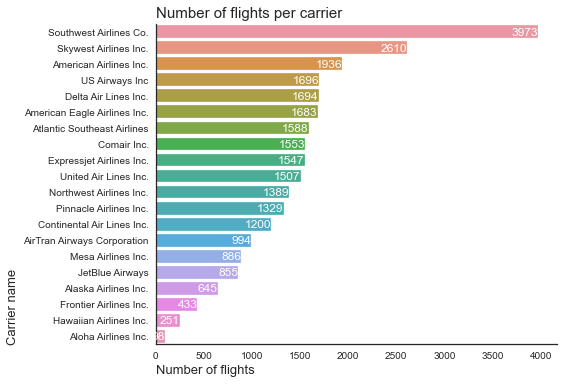

In [43]:
df_flights_per_airline = df_delayed_flights.groupby(["CarrierName", "FlightNum"]).count().reset_index().groupby(
    "CarrierName").count().sort_values(by="TailNum", ascending=False).rename(columns={"FlightNum": "Count"})
df_flights_per_airline = df_flights_per_airline.reset_index()

flights_per_airline_plot = sns.barplot(data=df_flights_per_airline, x="Count", y="CarrierName", orient="h")
flights_per_airline_plot.set_title('Number of flights per carrier', fontsize=15, loc='left' )
flights_per_airline_plot.set_xlabel('Number of flights', fontsize = 13, loc="left")
flights_per_airline_plot.set_ylabel('Carrier name', fontsize = 13, loc="bottom")

for p in flights_per_airline_plot.patches:
    flights_per_airline_plot.annotate(f'{int(p.get_width())}', 
                                     (p.get_x() + p.get_width() - 0.5, p.get_y() + p.get_height()- 0.05),
                ha='right', va='center', fontsize=12, color='white', xytext=(0, 5),
                textcoords='offset points')
plt.tight_layout()
sns.despine()

In relation to the Number of flights, in this case Southwest is the airline with the most number of flights, 1000 more than Skywest (the carrier with most number of routes).

We can say that Southwest has much frequency in their routes, based on the number of flights.

What about the aircrafts?

In [45]:
df_aircrafts_per_airline = df_delayed_flights.groupby(["CarrierName", "TailNum"]).count().reset_index().groupby(
    "CarrierName").count().sort_values(by="TailNum", ascending=False).rename(columns={"TailNum": "Count"})
df_aircrafts_per_airline = df_aircrafts_per_airline.reset_index()
df_aircrafts_per_airline[["CarrierName", "Count"]].head(5)

,CarrierName,Count
0,American Airlines Inc.,655
1,Southwest Airlines Co.,552
2,American Eagle Airlines Inc.,490
3,Delta Air Lines Inc.,461
4,United Air Lines Inc.,460


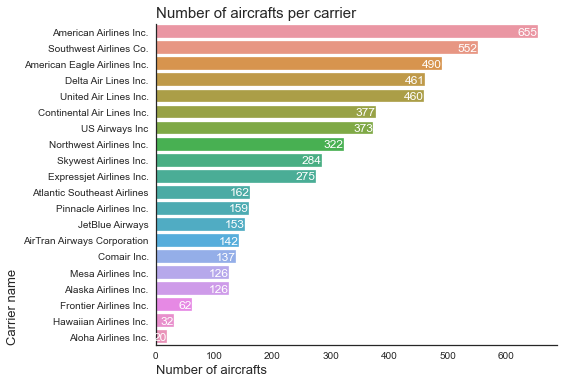

In [46]:
aircrafts_per_airline_plot = sns.barplot(data=df_aircrafts_per_airline, x="Count", y="CarrierName", orient="h")
aircrafts_per_airline_plot.set_title('Number of aircrafts per carrier', fontsize=15, loc='left' )
aircrafts_per_airline_plot.set_xlabel('Number of aircrafts', fontsize=13, loc="left")
aircrafts_per_airline_plot.set_ylabel('Carrier name', fontsize=13, loc="bottom")

for p in aircrafts_per_airline_plot.patches:
    aircrafts_per_airline_plot.annotate(f'{int(p.get_width())}', 
                                     (p.get_x() + p.get_width() - 0.5, p.get_y() + p.get_height()- 0.05),
                ha='right', va='center', fontsize=12, color='white', xytext=(0, 5),
                textcoords='offset points')
plt.tight_layout()
sns.despine()

American Airlines has almost 100 aircrafts more than Southwest Airlines, and it has much less routes and flights than Southwest. The low number of aircraft could end to the aircraft late delay.

We can guess that both airlines have aircraft with varying capacities and capabilities. Also it can be influenced by the market share, American Airlines and Southwest Airlines have different market shares and focus on different customer segments (don't forget that Southwest is a lowcost).

American Airlines typically operates a hub-and-spoke model, where it has major hub airports where passengers connect to various destinations. This model often requires a larger fleet to support connecting flights. Southwest Airlines, on the other hand, is known for its point-to-point service within the United States, and their routes could be short, allowing the airlie to reuse the aircraft.

---------------

##  Case Study
<a name="caseStudy"></a>

Southwest Airlines hired me to predict the delay of the flights and in the same time try to find the way to reduce it.

Southwest is the world's largest low-cost carrier. It is headquartered in Dallas, Texas. The low cost airlines have become very popular last years due to high emphasis on minimizing operating costs and without some of the traditional services and amenities provided in the fare, resulting in lower fares and fewer comforts.



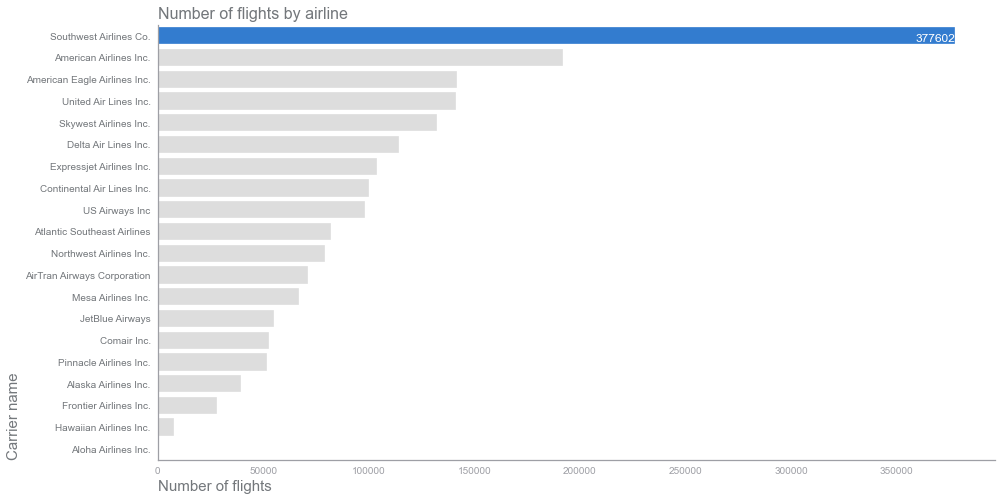

In [47]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15, 8))
df_airlines_with_delay_count = sns.countplot(y="CarrierName", data=df_delayed_flights,
                                            order=df_delayed_flights['CarrierName'].value_counts().index,
                                            orient ="b")

for bar in df_airlines_with_delay_count.patches:
    if bar.get_width() == df_delayed_flights['CarrierName'].value_counts().max():
        bar.set_facecolor('#337CCF')
        df_airlines_with_delay_count.annotate(f'{int(bar.get_width())}', 
                                     (bar.get_x() + bar.get_width() - 0.5, bar.get_y() + bar.get_height()- 0.05),
                ha='right', va='center', fontsize=12, color='white', xytext=(0, 5),
                textcoords='offset points')
    else:
        bar.set_facecolor('#DDDDDD')

ax.set_title('Number of flights by airline', fontsize = 16, loc="left", color='#73777B')
ax.set_xlabel('Number of flights', fontsize = 15, loc="left", color='#73777B')
ax.set_xlabel('Number of flights', fontsize = 15, loc="left", color='#73777B')
ax.tick_params(axis='x', colors='#9E9FA5')
ax.tick_params(axis='y', colors='#73777B') 
ax.spines['bottom'].set_color('#9E9FA5')
ax.spines['left'].set_color('#9E9FA5')
_ = ax.set_ylabel('Carrier name', fontsize = 15, loc="bottom", color='#73777B')
sns.despine()

As we see above, Southwest is the carrier most number of flights with 377602 flights.

I will select the flights related to Southwest.

In [48]:
df_wn_flights = df_delayed_flights[df_delayed_flights["UniqueCarrier"] == "WN"]

Let's explore the delay of the carrier.

In [49]:
df_wn_flights["ArrDelay"].describe()

count    377602.00000
mean         29.97625
std          42.92607
min        -109.00000
25%           5.00000
50%          17.00000
75%          39.00000
max         702.00000
Name: ArrDelay, dtype: float64

In [50]:
df_wn_flights["ArrDelay"].mode()

0    6.0
Name: ArrDelay, dtype: float64

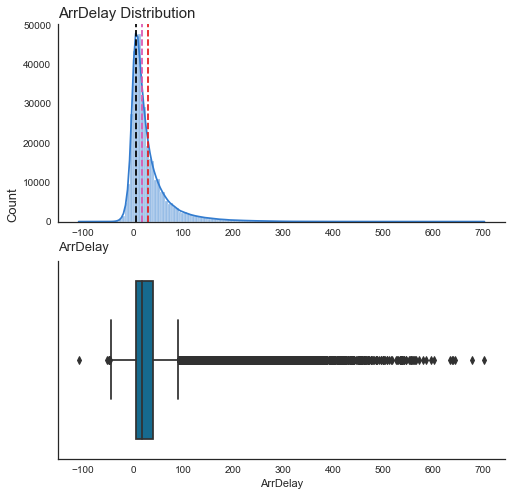

In [51]:
def print_numerical_distribution(df, feature):
    """ 
    Plot Histogram and box plots
    
    Parameters
    ----------
    df : dataframe
        Dataframe that contains the data
    feature : numerical feature name
        numerical feature name to plot
    """
    fix, ax = plt.subplots(2, 1, figsize = (8, 8))
    asd = sns.histplot(data=df, x=feature, color="#337CCF", kde=True, ax = ax[0], bins=150)
    ax[0].axvline(x = df[feature].mean(), color="#e31a1c", ls="--")
    ax[0].axvline(x = df[feature].mode()[0], color="black", ls="--")
    ax[0].axvline(x = df[feature].median(), color="#db57b2", ls="--")
    sns.boxplot(x=df[feature], ax = ax[1])
    ax[1].set_xlabel(feature)
    asd.set_title(feature + ' Distribution', fontsize = 15, loc="left")
    asd.set_ylabel('Count', fontsize = 13, loc="bottom")
    asd.set_xlabel(feature, fontsize = 13, loc="left")
    sns.despine()

print_numerical_distribution(df_wn_flights, "ArrDelay")

We see that most time of delays are between 5 and 39 minutes, where 6 is the most frequent time.

We can observe also many outliers, but I will keep them because I think that are valid values. There are negative times (where the aircraft arrived much elier than expected) and 702 minutes as maximum time.

Let's explore now how is Southwest in the different types of delays compared with the other carriers. Let's start with late aircraft delay.

#### Late Aircraft Delay

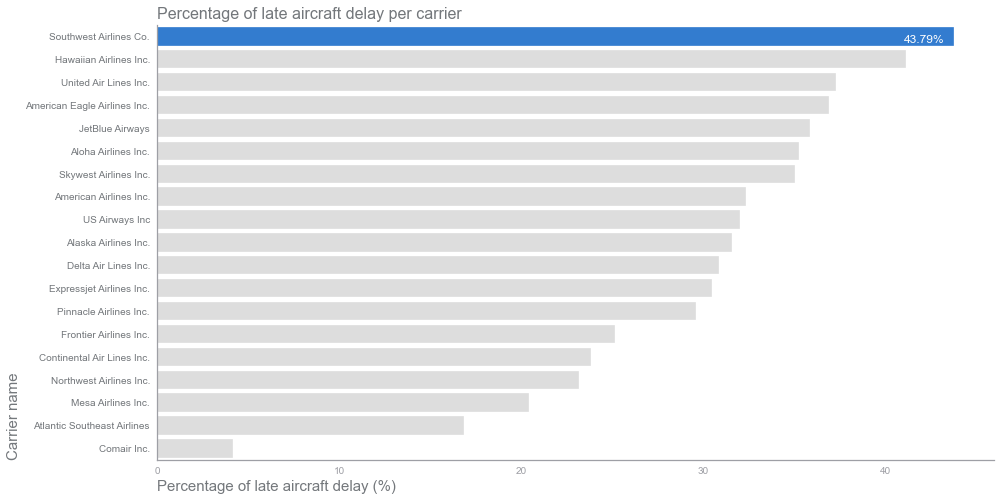

In [52]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15, 8))

df_carrier_delays_late_aircraft_delay = df_carrier_delays.sort_values(by="LateAircraftDelay_Percentage", ascending=False)
late_aircraft_delay_count_by_carrier_plot = sns.barplot(x="LateAircraftDelay_Percentage", y="CarrierName", 
                                                        data=df_carrier_delays_late_aircraft_delay,
                                                        orient ="h")

for bar in late_aircraft_delay_count_by_carrier_plot.patches:
    if bar.get_width() == df_carrier_delays['LateAircraftDelay_Percentage'].max():
        bar.set_facecolor('#337CCF')
        late_aircraft_delay_count_by_carrier_plot.annotate(f'{bar.get_width():.2f}%', 
                                     (bar.get_x() + bar.get_width() - 0.5, bar.get_y() + bar.get_height()- 0.05),
                ha='right', va='center', fontsize=12, color='white', xytext=(0, 5),
                textcoords='offset points')
    else:
        bar.set_facecolor('#DDDDDD')

late_aircraft_delay_count_by_carrier_plot.set_title('Percentage of late aircraft delay per carrier', 
                                                    fontsize = 16, loc="left", color='#73777B')
late_aircraft_delay_count_by_carrier_plot.set_xlabel('Percentage of late aircraft delay (%)', fontsize = 15, loc="left",
                                                     color='#73777B')
late_aircraft_delay_count_by_carrier_plot.tick_params(axis='x', colors='#9E9FA5')
late_aircraft_delay_count_by_carrier_plot.tick_params(axis='y', colors='#73777B') 
late_aircraft_delay_count_by_carrier_plot.spines['bottom'].set_color('#9E9FA5')
late_aircraft_delay_count_by_carrier_plot.spines['left'].set_color('#9E9FA5')
_ = late_aircraft_delay_count_by_carrier_plot.set_ylabel('Carrier name', fontsize = 15, loc="bottom", color='#73777B')
sns.despine()

Southwest is the carrier with most percentage of flights with late aircraft delay.

Let's see now how is the mean of time of the late aircraft delay of each carrier.

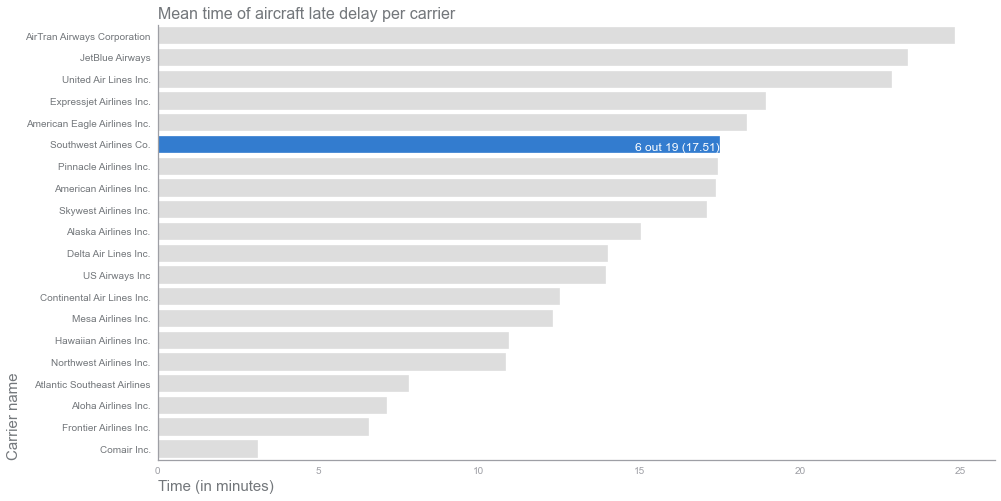

In [53]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15, 8))
df_aircraft_late_delay_mean = df_delayed_flights.groupby(by="CarrierName")["LateAircraftDelay"].mean().reset_index()
df_aircraft_late_delay_mean = df_aircraft_late_delay_mean.sort_values(by="LateAircraftDelay", ascending=False)

aircraft_late_delay_mean_plot = sns.barplot(x="LateAircraftDelay", y="CarrierName", 
                                                        data=df_aircraft_late_delay_mean,
                                                        orient ="h")

for bar in aircraft_late_delay_mean_plot.patches:
    if bar.get_width() == 17.508201757405946:
        bar.set_facecolor('#337CCF')
        aircraft_late_delay_mean_plot.annotate(f'6 out 19 ({bar.get_width():.2f})', 
                                     (bar.get_x() + bar.get_width(), bar.get_y() + bar.get_height()- 0.05),
                ha='right', va='center', fontsize=12, color='white', xytext=(0, 5),
                textcoords='offset points')
    else:
        bar.set_facecolor('#DDDDDD')

aircraft_late_delay_mean_plot.set_title('Mean time of aircraft late delay per carrier', 
                                                    fontsize = 16, loc="left", color='#73777B')
aircraft_late_delay_mean_plot.set_xlabel('Time (in minutes)', fontsize = 15, loc="left",
                                                     color='#73777B')
aircraft_late_delay_mean_plot.tick_params(axis='x', colors='#9E9FA5')
aircraft_late_delay_mean_plot.tick_params(axis='y', colors='#73777B') 
aircraft_late_delay_mean_plot.spines['bottom'].set_color('#9E9FA5')
aircraft_late_delay_mean_plot.spines['left'].set_color('#9E9FA5')
_ = aircraft_late_delay_mean_plot.set_ylabel('Carrier name', fontsize = 15, loc="bottom", color='#73777B')
sns.despine()

Our carrier is over the median, in the 6th place, with a mean of 17.51 minutes of delay.

#### Carrier Delay

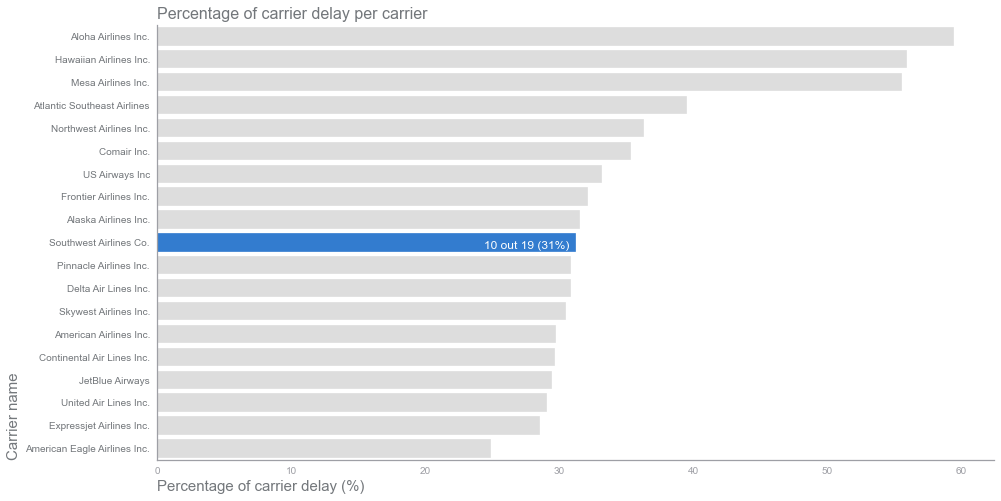

In [54]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15, 8))
df_carrier_delays_carrier_delay = df_carrier_delays.sort_values(by="CarrierDelay_Percentage", ascending=False)
carrier_delay_plot = sns.barplot(x="CarrierDelay_Percentage", y="CarrierName", 
                                                        data=df_carrier_delays_carrier_delay,
                                                        orient ="h")

for bar in carrier_delay_plot.patches:
    if bar.get_width() == 31.275101875251853:
        bar.set_facecolor('#337CCF')
        carrier_delay_plot.annotate(f'10 out 19 ({int(bar.get_width())}%)', 
                                     (bar.get_x() + bar.get_width() - 0.5, bar.get_y() + bar.get_height()- 0.05),
                ha='right', va='center', fontsize=12, color='white', xytext=(0, 5),
                textcoords='offset points')
    else:
        bar.set_facecolor('#DDDDDD')

carrier_delay_plot.set_title('Percentage of carrier delay per carrier', 
                                                    fontsize = 16, loc="left", color='#73777B')
carrier_delay_plot.set_xlabel('Percentage of carrier delay (%)', fontsize = 15, loc="left",
                                                     color='#73777B')
carrier_delay_plot.tick_params(axis='x', colors='#9E9FA5')
carrier_delay_plot.tick_params(axis='y', colors='#73777B') 
carrier_delay_plot.spines['bottom'].set_color('#9E9FA5')
carrier_delay_plot.spines['left'].set_color('#9E9FA5')
_ = carrier_delay_plot.set_ylabel('Carrier name', fontsize = 15, loc="bottom", color='#73777B')
sns.despine()

About Carrier delay, Soutwest is in the middle, has 31% of the flights with carrier delay. The carrier with most percentage is Hawaiian Airlines.

Let's see now how is the mean of time of Carrier delay of each carrier.

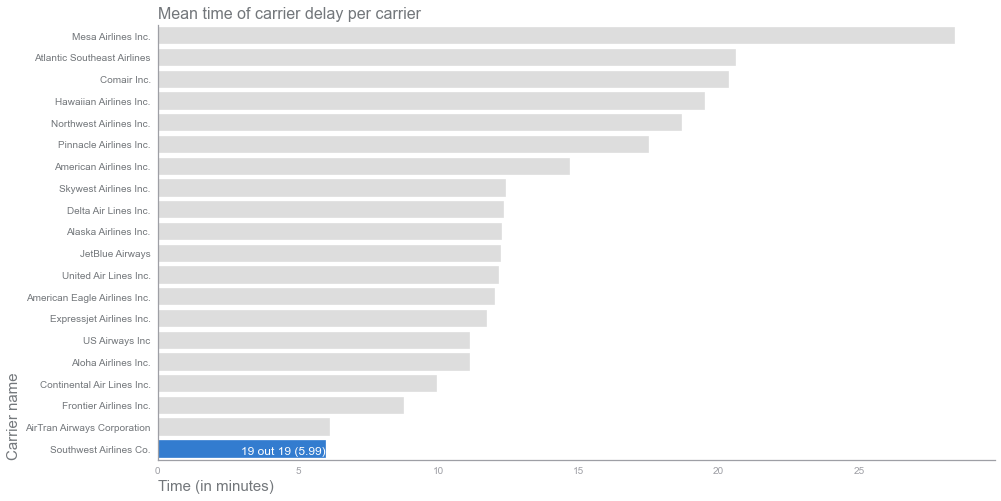

In [55]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15, 8))
df_carrier_late_delay_mean = df_delayed_flights.groupby(by="CarrierName")["CarrierDelay"].mean().reset_index()
df_carrier_late_delay_mean = df_carrier_late_delay_mean.sort_values(by="CarrierDelay", ascending=False)

carrier_delay_mean_plot = sns.barplot(x="CarrierDelay", y="CarrierName", 
                                                        data=df_carrier_late_delay_mean,
                                                        orient ="h")

for bar in carrier_delay_mean_plot.patches:
    if bar.get_width() == 5.9877913782236325:
        bar.set_facecolor('#337CCF')
        carrier_delay_mean_plot.annotate(f'19 out 19 ({bar.get_width():.2f})', 
                                     (bar.get_x() + bar.get_width(), bar.get_y() + bar.get_height()- 0.05),
                ha='right', va='center', fontsize=12, color='white', xytext=(0, 5),
                textcoords='offset points')
    else:
        bar.set_facecolor('#DDDDDD')

carrier_delay_mean_plot.set_title('Mean time of carrier delay per carrier', 
                                                    fontsize = 16, loc="left", color='#73777B')
carrier_delay_mean_plot.set_xlabel('Time (in minutes)', fontsize = 15, loc="left",
                                                     color='#73777B')
carrier_delay_mean_plot.tick_params(axis='x', colors='#9E9FA5')
carrier_delay_mean_plot.tick_params(axis='y', colors='#73777B') 
carrier_delay_mean_plot.spines['bottom'].set_color('#9E9FA5')
carrier_delay_mean_plot.spines['left'].set_color('#9E9FA5')
_ = carrier_delay_mean_plot.set_ylabel('Carrier name', fontsize = 15, loc="bottom", color='#73777B')
sns.despine()

We can see that our carrier is the airline with the lowest time of carrier delay, with a mean of 5.99 minutes.

#### NAS Delay

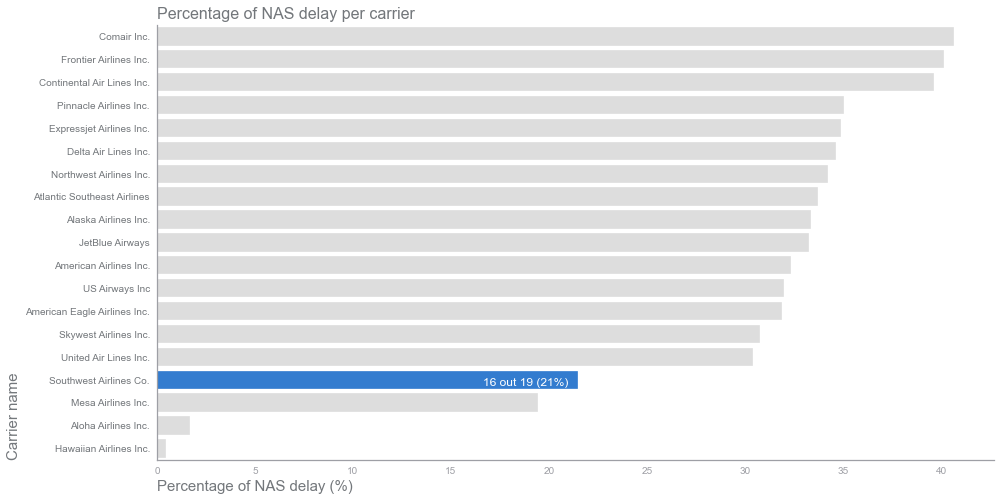

In [56]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15, 8))
df_carrier_delays_nas_delay = df_carrier_delays.sort_values(by="NASDelay_Percentage", ascending=False)
nas_delay_plot = sns.barplot(x="NASDelay_Percentage", y="CarrierName", 
                                                        data=df_carrier_delays_nas_delay,
                                                        orient ="h")

for bar in nas_delay_plot.patches:
    if bar.get_width() == 21.46732386322697:
        bar.set_facecolor('#337CCF')
        nas_delay_plot.annotate(f'16 out 19 ({int(bar.get_width())}%)', 
                                     (bar.get_x() + bar.get_width() - 0.5, bar.get_y() + bar.get_height()- 0.05),
                ha='right', va='center', fontsize=12, color='white', xytext=(0, 5),
                textcoords='offset points')
    else:
        bar.set_facecolor('#DDDDDD')

nas_delay_plot.set_title('Percentage of NAS delay per carrier', 
                                                    fontsize = 16, loc="left", color='#73777B')
nas_delay_plot.set_xlabel('Percentage of NAS delay (%)', fontsize = 15, loc="left",
                                                     color='#73777B')
nas_delay_plot.tick_params(axis='x', colors='#9E9FA5')
nas_delay_plot.tick_params(axis='y', colors='#73777B') 
nas_delay_plot.spines['bottom'].set_color('#9E9FA5')
nas_delay_plot.spines['left'].set_color('#9E9FA5')
_ = nas_delay_plot.set_ylabel('Carrier name', fontsize = 15, loc="bottom", color='#73777B')
sns.despine()

We see that Southwest has very low percentage of NAS Delay compared with other carriers, it has 21%.

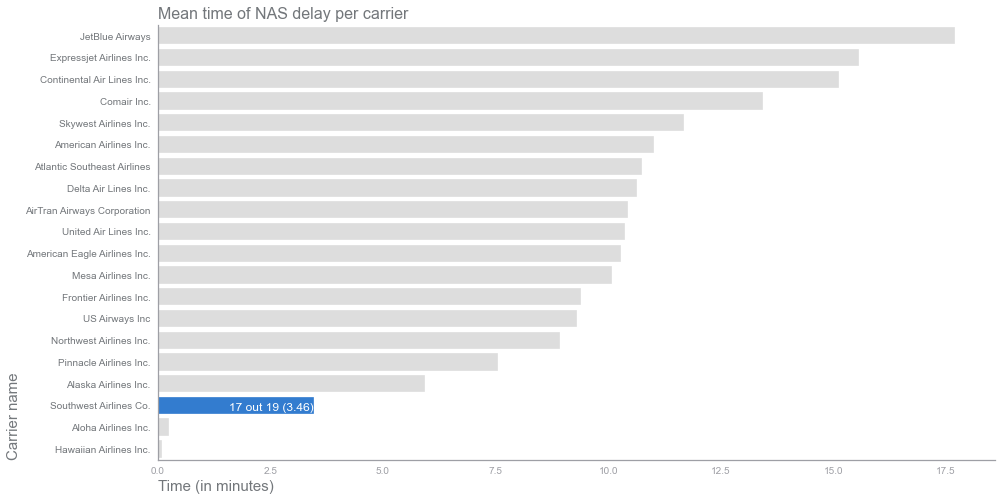

In [57]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15, 8))
df_nas_delay_mean = df_delayed_flights.groupby(by="CarrierName")["NASDelay"].mean().reset_index()
df_nas_delay_mean = df_nas_delay_mean.sort_values(by="NASDelay", ascending=False)

nas_delay_mean_plot = sns.barplot(x="NASDelay", y="CarrierName", 
                                                        data=df_nas_delay_mean,
                                                        orient ="h")

for bar in nas_delay_mean_plot.patches:
    if bar.get_width() == 3.4641024147117867:
        bar.set_facecolor('#337CCF')
        nas_delay_mean_plot.annotate(f'17 out 19 ({bar.get_width():.2f})', 
                                     (bar.get_x() + bar.get_width(), bar.get_y() + bar.get_height()- 0.05),
                ha='right', va='center', fontsize=12, color='white', xytext=(0, 5),
                textcoords='offset points')
    else:
        bar.set_facecolor('#DDDDDD')

nas_delay_mean_plot.set_title('Mean time of NAS delay per carrier', 
                                                    fontsize = 16, loc="left", color='#73777B')
nas_delay_mean_plot.set_xlabel('Time (in minutes)', fontsize = 15, loc="left",
                                                     color='#73777B')
nas_delay_mean_plot.tick_params(axis='x', colors='#9E9FA5')
nas_delay_mean_plot.tick_params(axis='y', colors='#73777B') 
nas_delay_mean_plot.spines['bottom'].set_color('#9E9FA5')
nas_delay_mean_plot.spines['left'].set_color('#9E9FA5')
_ = nas_delay_mean_plot.set_ylabel('Carrier name', fontsize = 15, loc="bottom", color='#73777B')
sns.despine()

As in Carrier delay, Southwest has one of the lowest time of NAS Delay, with 3.46 minutes.

#### Security Delay

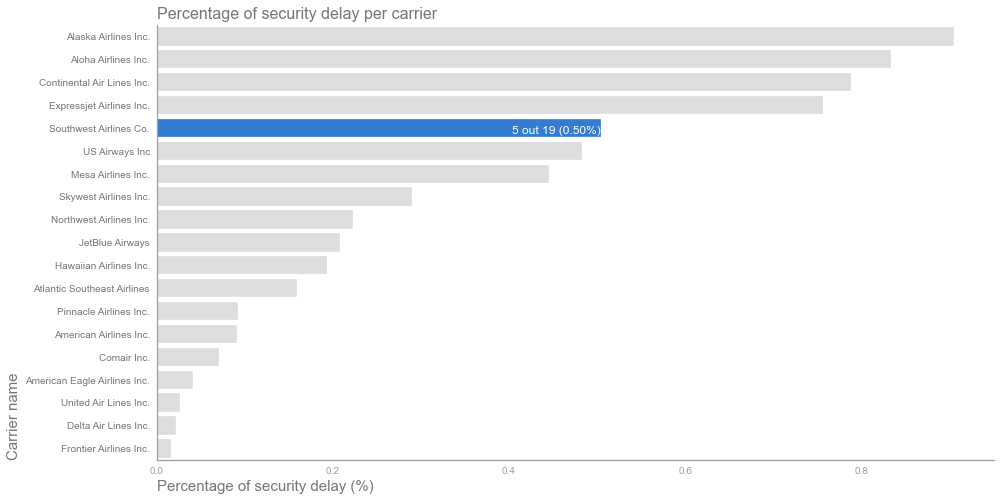

In [58]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15, 8))
df_carrier_delays_security_delay = df_carrier_delays.sort_values(by="SecurityDelay_Percentage", ascending=False)
security_delay_plot = sns.barplot(x="SecurityDelay_Percentage", y="CarrierName", 
                                                        data=df_carrier_delays_security_delay,
                                                        orient ="h")

for bar in security_delay_plot.patches:
    if bar.get_width() == 0.50463942699007:
        bar.set_facecolor('#337CCF')
        security_delay_plot.annotate(f'5 out 19 ({bar.get_width():.2f}%)', 
                                     (bar.get_x() + bar.get_width(), bar.get_y() + bar.get_height()- 0.05),
                ha='right', va='center', fontsize=12, color='white', xytext=(0, 5),
                textcoords='offset points')
    else:
        bar.set_facecolor('#DDDDDD')

security_delay_plot.set_title('Percentage of security delay per carrier', 
                                                    fontsize = 16, loc="left", color='#73777B')
security_delay_plot.set_xlabel('Percentage of security delay (%)', fontsize = 15, loc="left",
                                                     color='#73777B')
security_delay_plot.tick_params(axis='x', colors='#9E9FA5')
security_delay_plot.tick_params(axis='y', colors='#73777B') 
security_delay_plot.spines['bottom'].set_color('#9E9FA5')
security_delay_plot.spines['left'].set_color('#9E9FA5')
_ = security_delay_plot.set_ylabel('Carrier name', fontsize = 15, loc="bottom", color='#73777B')
sns.despine()

About the Security delay, Southwest is above the half, but all have a very low percentage.

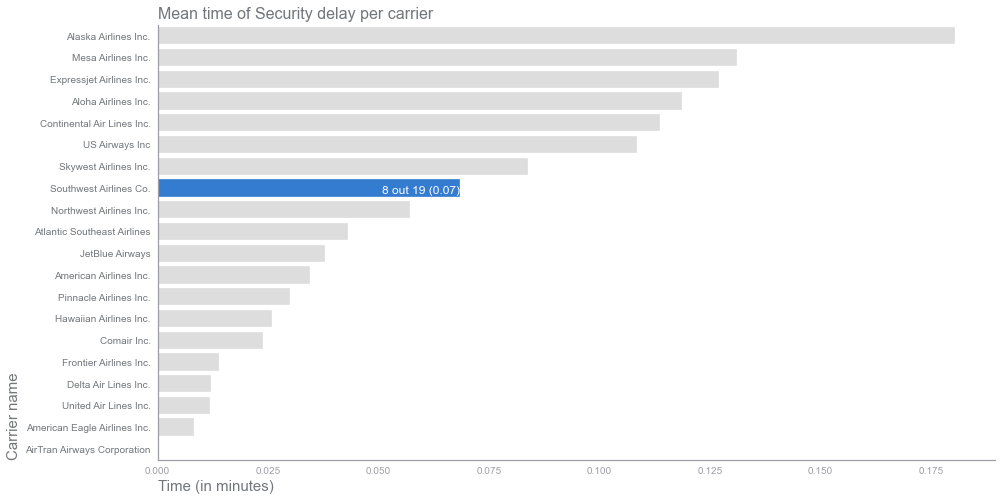

In [59]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15, 8))
df_security_delay_mean = df_delayed_flights.groupby(by="CarrierName")["SecurityDelay"].mean().reset_index()
df_security_delay_mean = df_security_delay_mean.sort_values(by="SecurityDelay", ascending=False)

security_delay_mean_plot = sns.barplot(x="SecurityDelay", y="CarrierName", 
                                                        data=df_security_delay_mean,
                                                        orient ="h")

for bar in security_delay_mean_plot.patches:
    if bar.get_width() == 0.06838152340294808:
        bar.set_facecolor('#337CCF')
        security_delay_mean_plot.annotate(f'8 out 19 ({bar.get_width():.2f})', 
                                     (bar.get_x() + bar.get_width(), bar.get_y() + bar.get_height()- 0.05),
                ha='right', va='center', fontsize=12, color='white', xytext=(0, 5),
                textcoords='offset points')
    else:
        bar.set_facecolor('#DDDDDD')

security_delay_mean_plot.set_title('Mean time of Security delay per carrier', 
                                                    fontsize = 16, loc="left", color='#73777B')
security_delay_mean_plot.set_xlabel('Time (in minutes)', fontsize = 15, loc="left",
                                                     color='#73777B')
security_delay_mean_plot.tick_params(axis='x', colors='#9E9FA5')
security_delay_mean_plot.tick_params(axis='y', colors='#73777B') 
security_delay_mean_plot.spines['bottom'].set_color('#9E9FA5')
security_delay_mean_plot.spines['left'].set_color('#9E9FA5')
_ = security_delay_mean_plot.set_ylabel('Carrier name', fontsize = 15, loc="bottom", color='#73777B')
sns.despine()

The time is close to the median, with 0.07 minutes, very low time.

#### Weather Delay

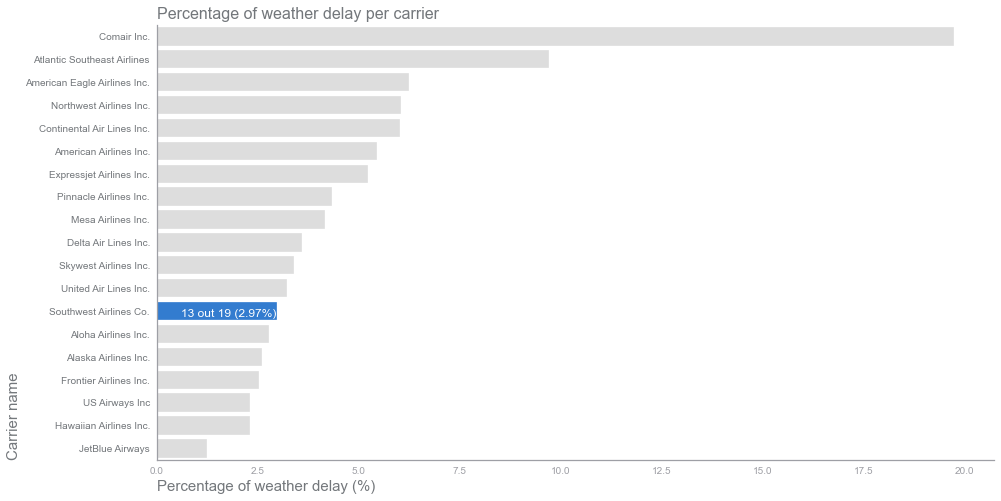

In [60]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15, 8))
df_weather_delays_security_delay = df_carrier_delays.sort_values(by="WeatherDelay_Percentage", ascending=False)
weather_delay_plot = sns.barplot(x="WeatherDelay_Percentage", y="CarrierName", 
                                                        data=df_weather_delays_security_delay,
                                                        orient ="h")

for bar in weather_delay_plot.patches:
    if bar.get_width() == 2.9659241626481427:
        bar.set_facecolor('#337CCF')
        weather_delay_plot.annotate(f'13 out 19 ({bar.get_width():.2f}%)', 
                                     (bar.get_x() + bar.get_width(), bar.get_y() + bar.get_height()- 0.05),
                ha='right', va='center', fontsize=12, color='white', xytext=(0, 5),
                textcoords='offset points')
    else:
        bar.set_facecolor('#DDDDDD')

weather_delay_plot.set_title('Percentage of weather delay per carrier', 
                                                    fontsize = 16, loc="left", color='#73777B')
weather_delay_plot.set_xlabel('Percentage of weather delay (%)', fontsize = 15, loc="left",
                                                     color='#73777B')
weather_delay_plot.tick_params(axis='x', colors='#9E9FA5')
weather_delay_plot.tick_params(axis='y', colors='#73777B') 
weather_delay_plot.spines['bottom'].set_color('#9E9FA5')
weather_delay_plot.spines['left'].set_color('#9E9FA5')
_ = weather_delay_plot.set_ylabel('Carrier name', fontsize = 15, loc="bottom", color='#73777B')
sns.despine()

Also Southwest has a low percentage of Weather Delay, just 2.97%

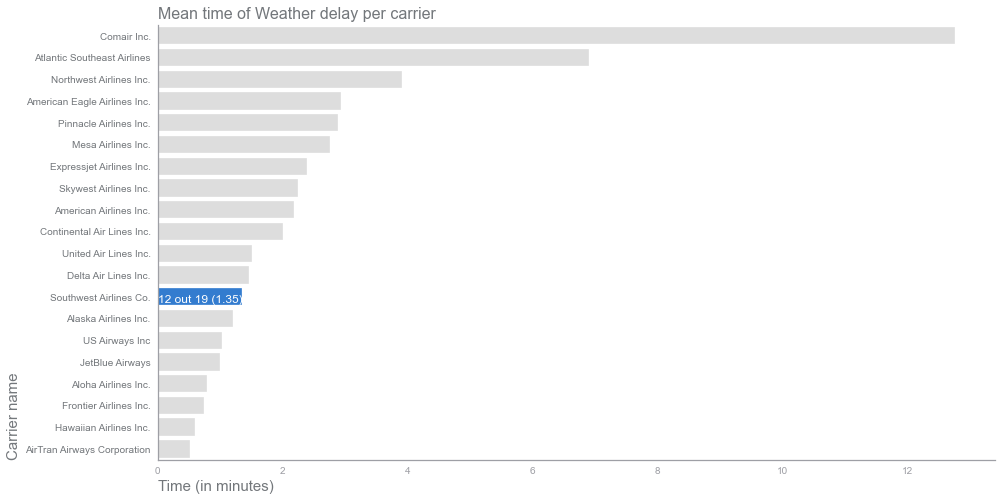

In [61]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15, 8))
df_weather_delay_mean = df_delayed_flights.groupby(by="CarrierName")["WeatherDelay"].mean().reset_index()
df_weather_delay_mean = df_weather_delay_mean.sort_values(by="WeatherDelay", ascending=False)

weather_delay_mean_plot = sns.barplot(x="WeatherDelay", y="CarrierName", 
                                                        data=df_weather_delay_mean,
                                                        orient ="h")

for bar in weather_delay_mean_plot.patches:
    if bar.get_width() == 1.3523895530214354:
        bar.set_facecolor('#337CCF')
        weather_delay_mean_plot.annotate(f'12 out 19 ({bar.get_width():.2f})', 
                                     (bar.get_x() + bar.get_width(), bar.get_y() + bar.get_height()- 0.05),
                ha='right', va='center', fontsize=12, color='white', xytext=(0, 5),
                textcoords='offset points')
    else:
        bar.set_facecolor('#DDDDDD')

weather_delay_mean_plot.set_title('Mean time of Weather delay per carrier', 
                                                    fontsize = 16, loc="left", color='#73777B')
weather_delay_mean_plot.set_xlabel('Time (in minutes)', fontsize = 15, loc="left",
                                                     color='#73777B')
weather_delay_mean_plot.tick_params(axis='x', colors='#9E9FA5')
weather_delay_mean_plot.tick_params(axis='y', colors='#73777B') 
weather_delay_mean_plot.spines['bottom'].set_color('#9E9FA5')
weather_delay_mean_plot.spines['left'].set_color('#9E9FA5')
_ = weather_delay_mean_plot.set_ylabel('Carrier name', fontsize = 15, loc="bottom", color='#73777B')
sns.despine()

Our carrier has a low time of weather delay time, just 1.35 minutes.

To summarize, the company has high percentage of LateAircraftDelay, and over the median if we talk about the mean of time. About the Carrier Delay, the carrier has a 31% of percentage with low value of mean time.
The percentage of NAS Delay is lower than Carrier Delay, with 21%, and with a very low time of delay.
Finally, Southwest has few percentage and time delays of security and weather.

------------------------

I said before, Southwest is known for its point-to-point service within the United States. Let's explore the distance of their routes.

In [62]:
df_wn_flights["Distance"].describe()

count    377602.000000
mean        650.811381
std         458.834474
min         133.000000
25%         325.000000
50%         472.000000
75%         862.000000
max        2363.000000
Name: Distance, dtype: float64

In [63]:
df_wn_flights["Distance"].mode()

0    337
Name: Distance, dtype: int64

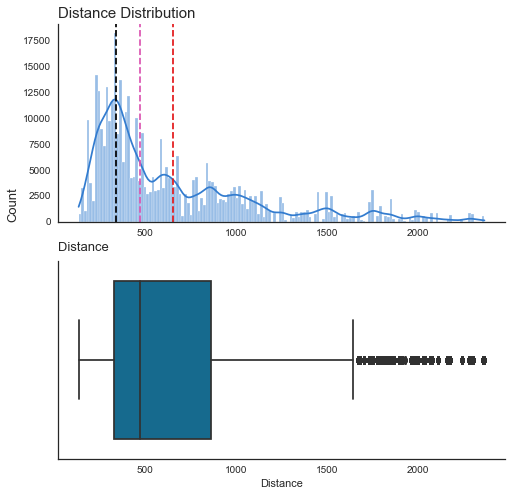

In [64]:
print_numerical_distribution(df_wn_flights, "Distance")

We see that the distribution of the distance is right skewed, with 337 km as most frequent distance, and 650 km as mean. The median is 472 km.

Most of the routes have a distance that are between 325 and 862 km. We see also that the values are well spread with a 458 km around the mean.

The maximum distance is 2363 km.

To end up with the analysis, let's see some routes in a map.

First at all, I will get a CSV file with airports, in order to get their coordenades and city.

This file was gotten from https://ourairports.com/help/data-dictionary.html

In [65]:
usa_airports = pd.read_csv("airports.csv")
usa_airports = usa_airports[usa_airports["iso_country"] == "US"]
usa_airports = usa_airports[["iata_code", "latitude_deg", "longitude_deg", "municipality"]]

Now I get the coordenades of the origin and destination airports of the top 10 flights with more delays.

In [66]:
origin_dest_top_10 = df_wn_flights[df_wn_flights["ArrDelay"] > 0].groupby(["Origin", "Dest"]).count()
origin_dest_top_10 = origin_dest_top_10.rename(columns={"Year": "CountFlights"}).sort_values(by="CountFlights", 
                                                                                             ascending=False).head(10)
origin_dest_top_10 = origin_dest_top_10.reset_index()[["Origin", "Dest", "CountFlights"]]

origin_dest_top_10 = pd.merge(origin_dest_top_10, usa_airports, left_on='Origin', right_on='iata_code')
origin_dest_top_10 = origin_dest_top_10.rename(columns={"latitude_deg": "origin_latitude_deg"})
origin_dest_top_10 = origin_dest_top_10.rename(columns={"longitude_deg": "origin_longitude_deg"})

origin_dest_top_10 = pd.merge(origin_dest_top_10, usa_airports, left_on='Dest', right_on='iata_code')
origin_dest_top_10 = origin_dest_top_10.rename(columns={"latitude_deg": "dest_latitude_deg"})
origin_dest_top_10 = origin_dest_top_10.rename(columns={"longitude_deg": "dest_longitude_deg"})

In [67]:
usa_airports_top_10 = usa_airports[(usa_airports["iata_code"].isin(origin_dest_top_10["Origin"])) | 
                                   (usa_airports["iata_code"].isin(origin_dest_top_10["Dest"]))]

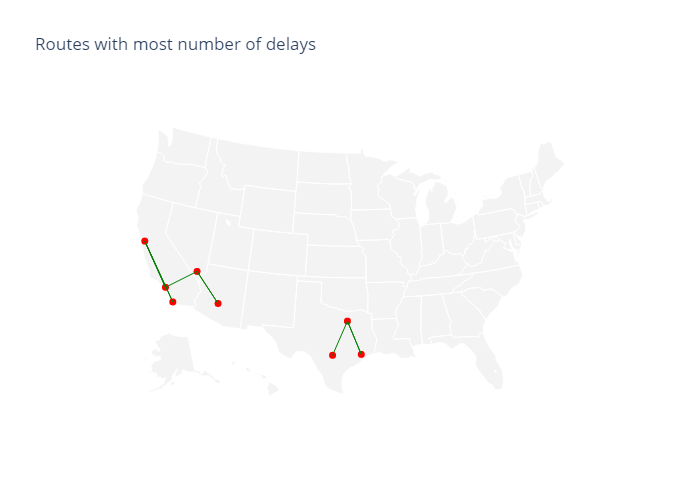

In [70]:
fig = go.Figure()
fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = usa_airports_top_10['longitude_deg'],
    lat = usa_airports_top_10['latitude_deg'],
    text = usa_airports_top_10['municipality'],
    mode = 'markers',
    marker = dict(
        size = 7,
        color = 'rgb(255, 0, 0)'
    )
))

flight_paths = []
for i in range(len(origin_dest_top_10)):
    fig.add_trace(
        go.Scattergeo(
            locationmode = 'USA-states',
            lon = [origin_dest_top_10['origin_longitude_deg'][i], origin_dest_top_10['dest_longitude_deg'][i]],
            lat = [origin_dest_top_10['origin_latitude_deg'][i], origin_dest_top_10['dest_latitude_deg'][i]],
            mode = 'lines',
            #text=origin_dest['CountFlights'],
            #hoverinfo= 'text',
            line = dict(width = 1,color = 'green'),
            #opacity = float(df_flight_paths['cnt'][i]) / float(df_flight_paths['cnt'].max()),
        )
    )

fig.update_layout(
    title_text = 'Routes with most number of delays',
    showlegend = False,
    geo = dict(
        scope = 'usa',
       # projection_type = 'azimuthal equal area',
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
)
fig.show("png")

In [69]:
origin_dest_top_10[["Origin", "Dest", "CountFlights"]].sort_values(by="CountFlights", ascending=False)

,Origin,Dest,CountFlights
0,HOU,DAL,3070
1,DAL,HOU,2970
3,PHX,LAS,1937
4,LAX,OAK,1838
6,OAK,LAX,1800
5,SAN,OAK,1728
7,LAS,LAX,1708
9,LAS,PHX,1655
2,DAL,SAT,1540
8,OAK,SAN,1537


Here we can see the flights with more delays, most of them are in the states of California and Texas.

The flight from Houston (HOU) to Dallas (DAL) has the most number of delays with 3070 flights. The same happens with the flight between the same airports but from Dallas to Houston. These routes have a high number of flights, close to 3000. But in the next routes the number of flights decrease to 1937. 

Let's see now the flights with the highest time of delays.

In [71]:
origin_dest_longer_time = df_wn_flights.groupby(["Origin", "Dest"])["ArrDelay"].mean()
origin_dest_longer_time = origin_dest_longer_time.reset_index().rename(
    columns={"ArrDelay": "MeanDelay"}).sort_values(by="MeanDelay", ascending=False).head(10)

usa_airports_long_delay = usa_airports[(usa_airports["iata_code"].isin(origin_dest_longer_time["Origin"])) | 
                                       (usa_airports["iata_code"].isin(origin_dest_longer_time["Dest"]))]

origin_dest_longer_time = pd.merge(origin_dest_longer_time, usa_airports_long_delay, left_on='Origin', right_on='iata_code')
origin_dest_longer_time = origin_dest_longer_time.rename(columns={"latitude_deg": "origin_latitude_deg"})
origin_dest_longer_time = origin_dest_longer_time.rename(columns={"longitude_deg": "origin_longitude_deg"})

origin_dest_longer_time = pd.merge(origin_dest_longer_time, usa_airports_long_delay, left_on='Dest', right_on='iata_code')
origin_dest_longer_time = origin_dest_longer_time.rename(columns={"latitude_deg": "dest_latitude_deg"})
origin_dest_longer_time = origin_dest_longer_time.rename(columns={"longitude_deg": "dest_longitude_deg"})

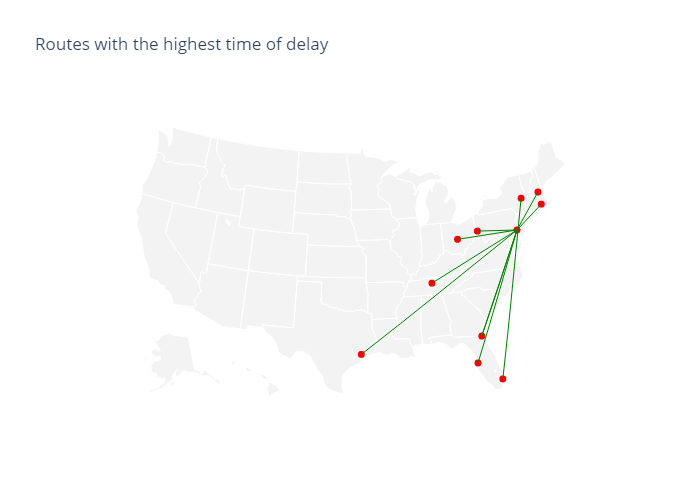

In [72]:
fig = go.Figure()
fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = usa_airports_long_delay['longitude_deg'],
    lat = usa_airports_long_delay['latitude_deg'],
    #hoverinfo = 'text',
    text = usa_airports_long_delay['municipality'],
    mode = 'markers',
    marker = dict(
        size = 7,
        color = 'rgb(255, 0, 0)'
    )
))

flight_paths = []
for i in range(len(origin_dest_longer_time)):
    fig.add_trace(
        go.Scattergeo(
            locationmode = 'USA-states',
            lon = [origin_dest_longer_time['origin_longitude_deg'][i], origin_dest_longer_time['dest_longitude_deg'][i]],
            lat = [origin_dest_longer_time['origin_latitude_deg'][i], origin_dest_longer_time['dest_latitude_deg'][i]],
            mode = 'lines',
            #text=origin_dest['CountFlights'],
            #hoverinfo= 'text',
            line = dict(width = 1,color = 'green'),
            #opacity = float(df_flight_paths['cnt'][i]) / float(df_flight_paths['cnt'].max()),
        )
    )

fig.update_layout(
    title_text = 'Routes with the highest time of delay',
    showlegend = False,
    geo = dict(
        scope = 'usa',
       # projection_type = 'azimuthal equal area',
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
)
fig.show("png")

In [73]:
origin_dest_longer_time[["Origin", "Dest", "MeanDelay"]].sort_values(by="MeanDelay", ascending=False)

,Origin,Dest,MeanDelay
0,ALB,FLL,59.100000
1,PVD,PHL,57.313043
2,MHT,PHL,56.727672
5,PHL,BNA,55.804795
6,PHL,CMH,51.706522
3,JAX,PHL,51.077273
4,PIT,PHL,50.616511
7,PHL,JAX,50.326271
8,PHL,HOU,48.957265
9,PHL,TPA,48.728916


About the routes with most time of delay, we can see that most of the routes are related with Philadelphia, and most of them have long distance.

----------------------------------------

## Unvariate, Bivariate and Multivariate Analysis.
<a name="uniAnalysis"></a>

Before starting the analysis, as we have many features let's see the correlation of the features in order to reduce them.

Our target is the ArrDelay, we want to predict this feature.

Let's see the correlation of our features to our target.

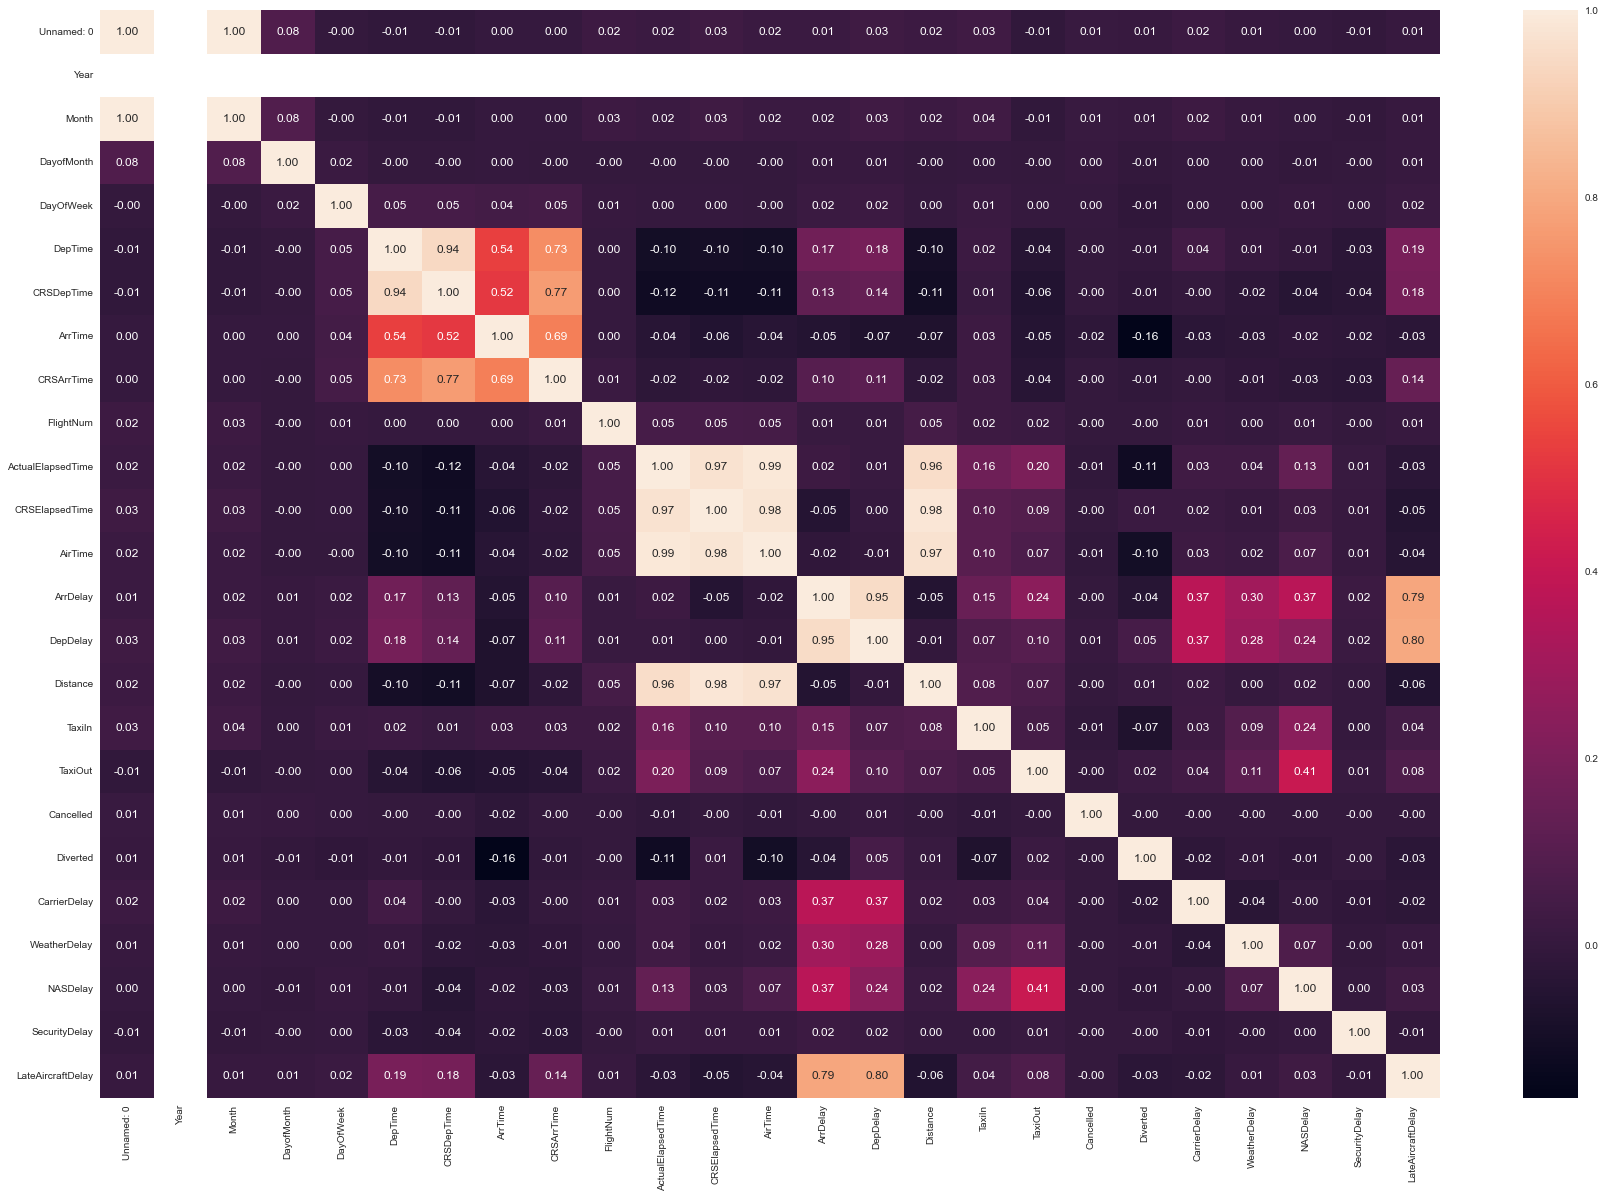

In [74]:
plt.figure(figsize=(30,20))
sns.heatmap(df_wn_flights.corr(), annot=True, fmt=".2f")
plt.show()

We see that our target is correlated to:
- CarrierDelay
- WeatherDelay
- NASDelay
- LateAircraftDelay
- DepDelay
- TaxiOut

But we have some features that are correlated with each other:
- DepDelay -> CarrierDelay, WeatherDelay, NASDelay and LateAircraftDelay
- TaxiOut -> NASDelay

As I have analysed all the different delays (and because I think that it is most interesting), I will choose them. And as NASDelay has more correlation than TaxiOut, I will take NASDelay.

<a name="featureAnalysis"></a>

### Univariate Analysis<a name="uni"></a>

All the selected features are numerical

#### LateAircraftDelay

In [75]:
df_wn_flights["LateAircraftDelay"].describe()

count    377602.000000
mean         17.508202
std          34.778642
min           0.000000
25%           0.000000
50%           0.000000
75%          22.000000
max         638.000000
Name: LateAircraftDelay, dtype: float64

In [76]:
df_wn_flights["LateAircraftDelay"].mode()

0    0.0
Name: LateAircraftDelay, dtype: float64

In [77]:
scipy.stats.skew(df_wn_flights["LateAircraftDelay"])

3.766998935095966

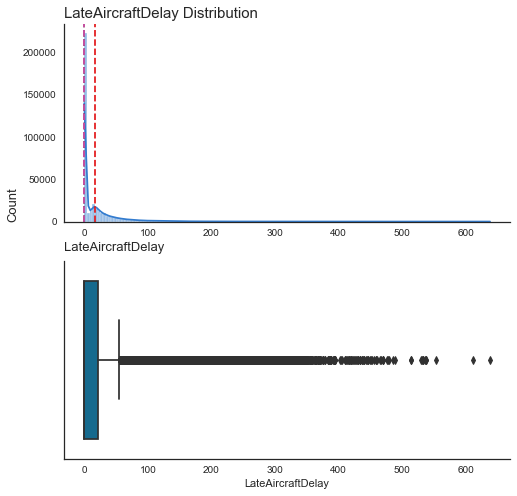

In [78]:
print_numerical_distribution(df_wn_flights, "LateAircraftDelay")

We have a positive skewed distribution, median and most frequent time of zero. The mean is 17 minutes, most of the delays are between 0 and 22 minutes, and their distribution is narrow about 34 minutes around the mean. And the maximum time is 638 minutes.

#### Carrier Delay

In [81]:
df_wn_flights["CarrierDelay"].describe()

count    377602.000000
mean          5.987791
std          17.873944
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max         668.000000
Name: CarrierDelay, dtype: float64

In [82]:
df_wn_flights["CarrierDelay"].mode()

0    0.0
Name: CarrierDelay, dtype: float64

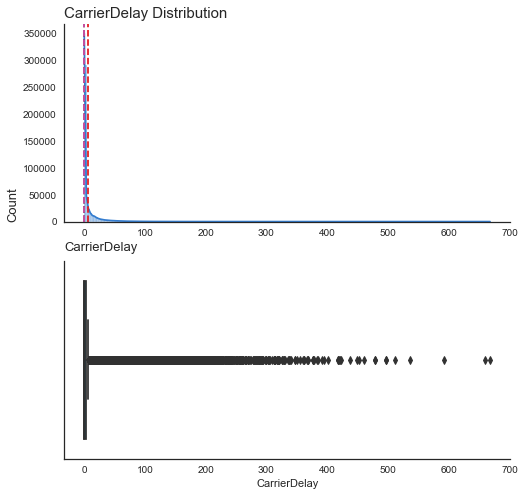

In [83]:
print_numerical_distribution(df_wn_flights, "CarrierDelay")

We have a positive skewed and very narrow distribution. The most frequent time is zero. And the mean is 5.98 minutes. We can see also many outliers, where the maximum time is 668 minutes.

#### NAS Delay

In [84]:
df_wn_flights["NASDelay"].describe()

count    377602.000000
mean          3.464102
std          14.183651
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         602.000000
Name: NASDelay, dtype: float64

In [85]:
df_wn_flights["NASDelay"].mode()

0    0.0
Name: NASDelay, dtype: float64

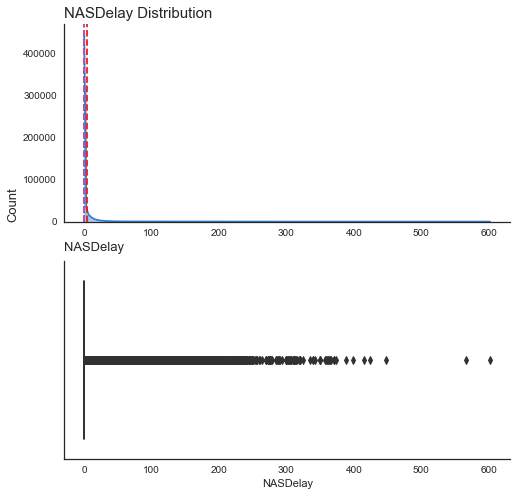

In [86]:
print_numerical_distribution(df_wn_flights, "NASDelay")

We have here also a positive skewed and very narrow distribution. The most frequent time and median is zero. We can see also many outliers, where the maximum time is 602 minutes. And the mean is 3.46 minutes.

#### Weather Delay

In [87]:
df_wn_flights["WeatherDelay"].describe()

count    377602.000000
mean          1.352390
std          12.547971
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         555.000000
Name: WeatherDelay, dtype: float64

In [88]:
df_wn_flights["WeatherDelay"].mode()

0    0.0
Name: WeatherDelay, dtype: float64

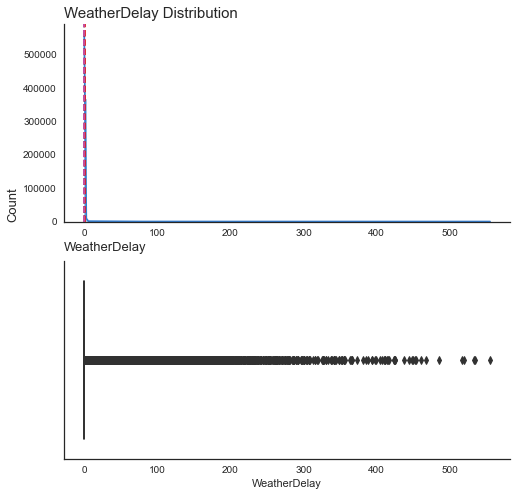

In [89]:
print_numerical_distribution(df_wn_flights, "WeatherDelay")

We have here also a positive skewed and very narrow distribution. The most frequent time, and median is zero. We can see also many outliers, where the maximum time is 555 minutes.

To summarize, most of the delays have zero as frequent value, but the mean is affected by the high number of flights with high delays.

### Bivariate Analysis<a name="bi"></a>

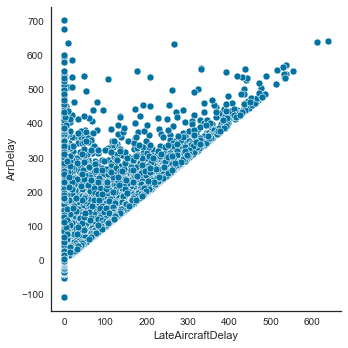

In [92]:
_ = sns.relplot(data=df_wn_flights, x="LateAircraftDelay", y="ArrDelay")

We clearly can appreciate how the arrival delay increases with the late aircraft delay, it shows the positive correlation.

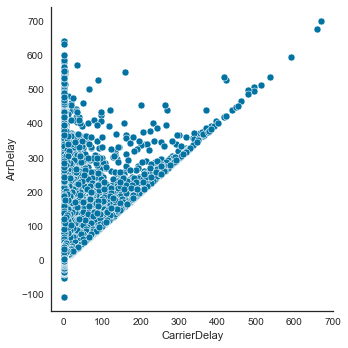

In [93]:
_ = sns.relplot(data=df_wn_flights, x="CarrierDelay", y="ArrDelay")

Related to the Carrier Delay, we also see a positive correlation, similar to Late aircraft delay.

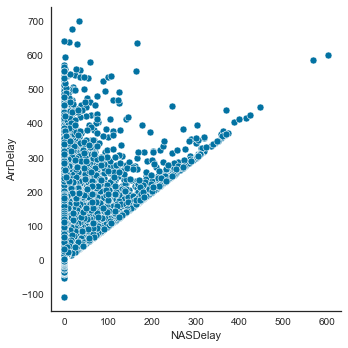

In [94]:
_ = sns.relplot(data=df_wn_flights, x="NASDelay", y="ArrDelay")

We can see that the relationships between the delays and the target are very similar.

------------------------------------------------------------------

What about the Origin and Destination? As we saw in the maps, the routes have different arrive delays.

There are too many values of Origin and Destination, and due to the limited resources, I will use the city of the airport instead of the airport code, in order to reduce the number of values.

In [95]:
usa_airports = pd.read_csv("airports3.csv")
usa_airports = usa_airports[["IATA", "City"]]

df_wn_flights = pd.merge(df_wn_flights, usa_airports, left_on='Origin', right_on='IATA')
df_wn_flights = df_wn_flights.drop('Origin', axis=1)
df_wn_flights = df_wn_flights.drop('IATA', axis=1)
df_wn_flights = df_wn_flights.rename(columns={"City": "Origin"})

df_wn_flights = pd.merge(df_wn_flights, usa_airports, left_on='Dest', right_on='IATA')
df_wn_flights = df_wn_flights.drop('Dest', axis=1)
df_wn_flights = df_wn_flights.drop('IATA', axis=1)
df_wn_flights = df_wn_flights.rename(columns={"City": "Dest"})

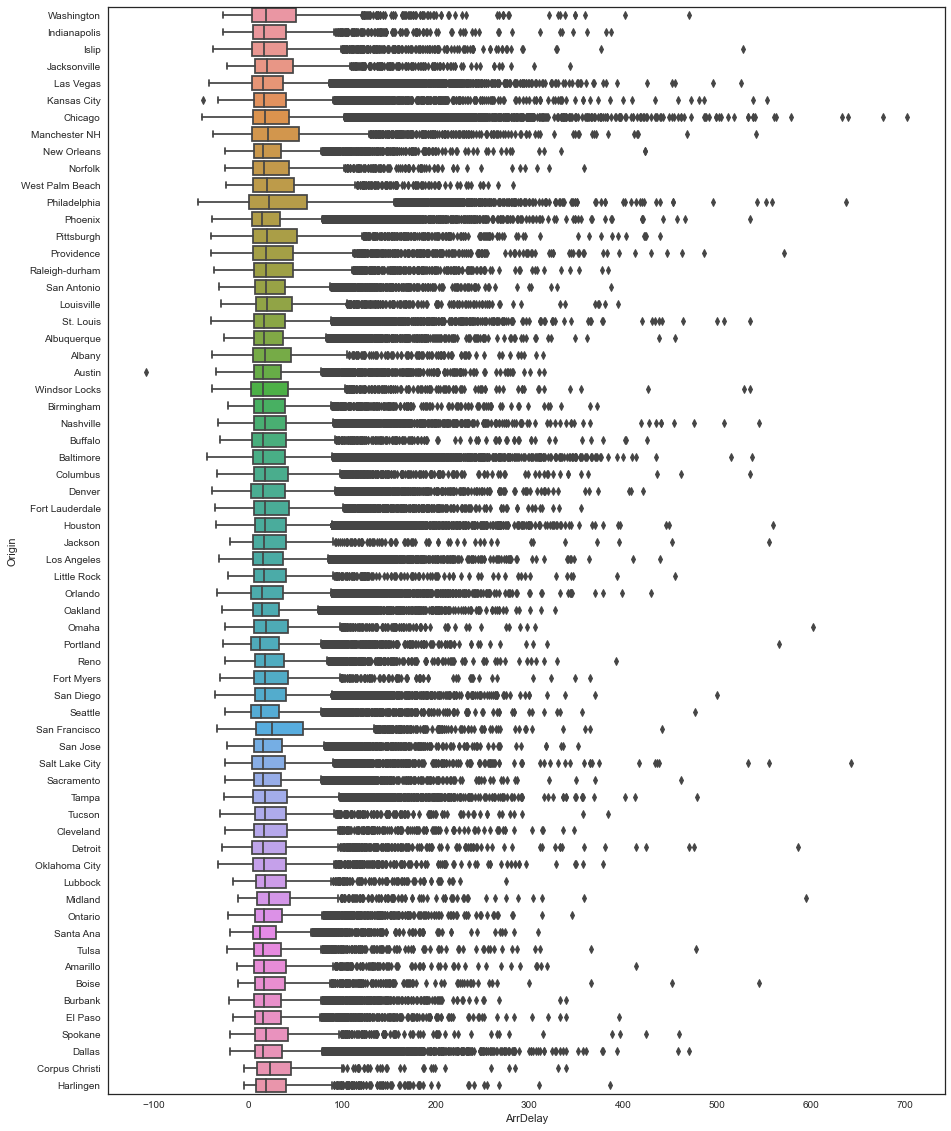

In [96]:
fig, ax = plt.subplots(figsize=(15, 20))
_ = sns.boxplot(data=df_wn_flights, x="ArrDelay", y="Origin", ax=ax)

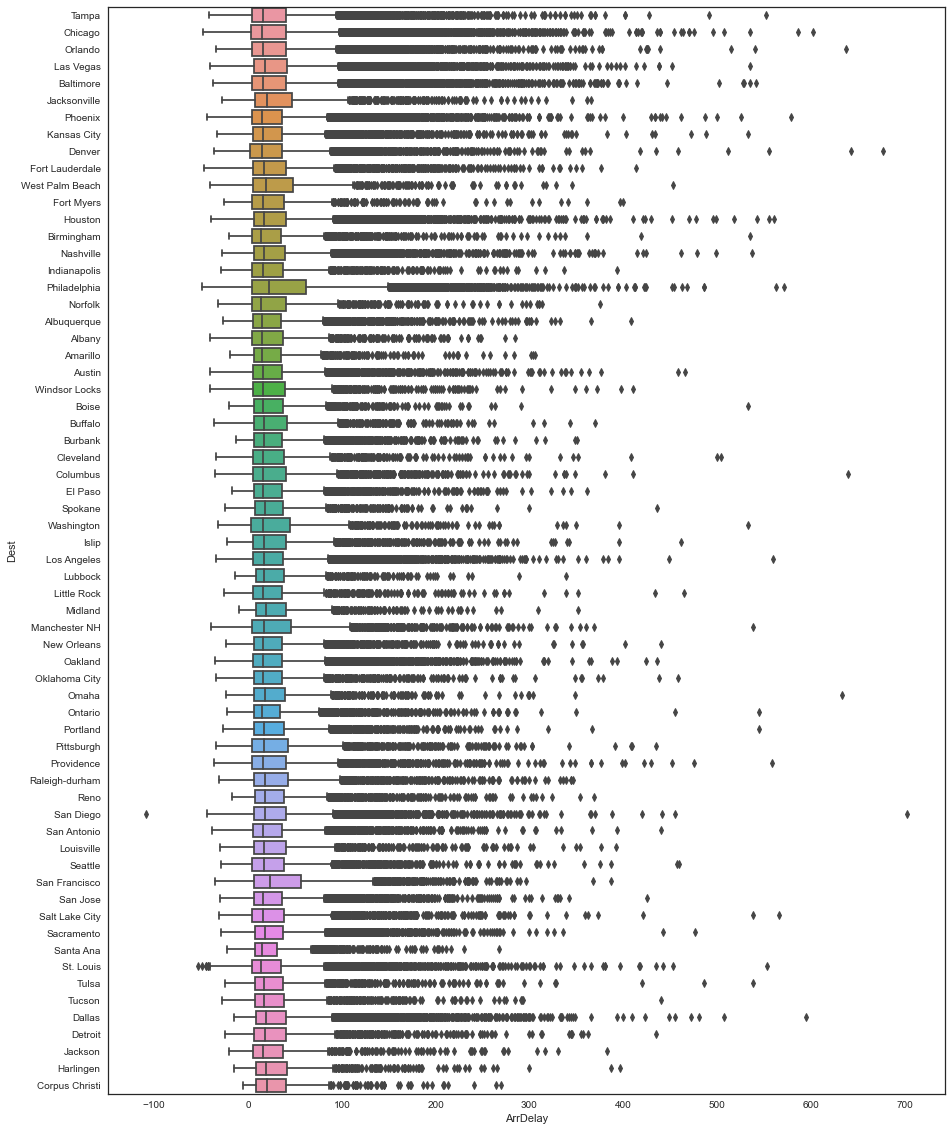

In [97]:
fig, ax = plt.subplots(figsize=(15, 20))
_ = sns.boxplot(data=df_wn_flights, x="ArrDelay", y="Dest", ax=ax)

We can see how the Arrive Delay varies with the origin and distination. In states like Pennsylvania, New Hampshire, and Rhode Island, the delay is well spread.

And other states like New Mexico, Louisiana and Arizona, the delay distribution is narrow.

## Modeling<a name="modeling"></a>

It is time to predict the Arrive Delay, for that I will use some models, I will evaluate them and I will try to improve their performance by tuning the hyperparameters.

Before that, I will split the dataset into train and test sets.
Then I will scale the numerical features, and encode the categoricals features.
For the categorical features I will use BinaryEncoder, in order to not encrease too much the dimension of the data.
I will do all of these by using a pipeline.

In [100]:
X_data = df_wn_flights.copy()
del X_data['ArrDelay']

X_train, X_test, y_train, y_test = train_test_split(X_data, df_wn_flights['ArrDelay'], test_size=0.30)

In [101]:
class Debug(BaseEstimator, TransformerMixin):
    """ 
    Debug class used to print the shape of the data through the different steps of the pipeline.
    """
    def transform(self, X):
        print(X.shape)
        #print(pd.DataFrame(X).describe())
        #what other output you want
        return X

    def fit(self, X, y=None, **fit_params):
        return self


class ColumnDropperTransformer():
    """
    Class Transformer to remove the unnecessary columns
    """
    def __init__(self,columns):
        self.columns = columns

    def transform(self, data, y=None):
        return data.drop(self.columns,axis=1)

    def fit(self, data, y=None):
        return self

In [102]:
numerical_pipeline = Pipeline(
    steps=[
        ('number_scale', MinMaxScaler()),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("asdasd", numerical_pipeline, ["CarrierDelay", "WeatherDelay", "NASDelay", "LateAircraftDelay"]),
        ('encoder_dest', BinaryEncoder(), ['Dest']),
        ('encoder_origin', BinaryEncoder(), ['Origin'])
    ],
    remainder='passthrough'
)

preprocessor_pipeline = Pipeline(steps=[('drop_colummns', ColumnDropperTransformer(['Unnamed: 0', 'Year', 'Month', 
                                        'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 
                                        'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 
                                        'AirTime', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut',
                                        'Cancelled', 'CancellationCode', 'Diverted',
                                        'SecurityDelay','CarrierName', 'FlighStatus'])),
                                        ('preprocessor', preprocessor)
                                        #('debudg', Debug()),
                                       ])

### Decicsion Tree <a name="dt"></a>

In [593]:
pipeline_dtr_default = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                                      ("model", DecisionTreeRegressor(random_state=42))])
pipeline_dtr_default.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_pipeline',
                 Pipeline(steps=[('drop_colummns',
                                  <__main__.ColumnDropperTransformer object at 0x0000011DA8C6EAC0>),
                                 ('preprocessor',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('asdasd',
                                                                   Pipeline(steps=[('number_scale',
                                                                                    MinMaxScaler())]),
                                                                   ['CarrierDelay',
                                                                    'WeatherDelay',
                                                                    'NASDelay',
                                                                    'LateAircraftDelay']),
                                                                  ('encoder_dest',
                                                                   BinaryEncoder(),
                                                                   ['Dest']),
                                                                  ('encoder_origin',
                                                                   BinaryEncoder(),
                                                                   ['Origin'])]))])),
                ('model', DecisionTreeRegressor(random_state=42))])

In [594]:
y_train_dtr_predicted = pipeline_dtr_default.predict(X_train)
r2_dtr_train_score = metrics.r2_score(y_train, y_train_dtr_predicted)
r2_dtr_train_score

0.9875577658861067

In [596]:
mse_dtr_train = metrics.mean_squared_error(y_train, y_train_dtr_predicted, squared=False)
mse_dtr_train

4.8122742731213375

In [597]:
y_test_dtr_predicted = pipeline_dtr_default.predict(X_test)
r2_rf_test_score = metrics.r2_score(y_test, y_test_dtr_predicted)
r2_rf_test_score

0.9819905492691969

In [598]:
mse_dtr_test = metrics.mean_squared_error(y_test, y_test_dtr_predicted, squared=False)
mse_dtr_test

5.692351143495343

With Decision Tree, we get good predictions, with the trains and test data, with a R2 score of 0.98 and RMSE of 5.69 minutes.

Let's try now their performance by tuning the hyperparameters.

In [599]:
pipeline_dtr = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                              ('model', DecisionTreeRegressor(random_state=42))])

dtr_param = {'model__criterion': ['squared_error', 'friedman_mse'],
             'model__max_features': ['sqrt', 'log2'],
             'model__min_samples_split': [2, 8, 10, 15, 20],
             'model__max_depth': [2, 8, 10, 15, 20],
             'model__min_samples_leaf': [2, 8, 10, 15, 20]
            }
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
dtr_search = GridSearchCV(pipeline_dtr, dtr_param, cv=cv, error_score='raise', scoring='neg_mean_squared_error', n_jobs=-1)

In [601]:
dtr_search_result = dtr_search.fit(X_train, y_train)
print(dtr_search_result.best_params_)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



{'model__criterion': 'friedman_mse', 'model__max_depth': 20, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__min_samples_split': 2}


In [122]:
pipeline_dtr_hyper = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                                     ('model', DecisionTreeRegressor(random_state=42, criterion='friedman_mse', 
                                                                     max_depth=20, 
                                      max_features='sqrt', min_samples_leaf=2, min_samples_split=2))])
pipeline_dtr_hyper.fit(X_train, y_train)
y_train_predicted_dtr_hyper = pipeline_dtr_hyper.predict(X_train)
rmse_train_dtr_hyper = mean_squared_error(y_train, y_train_predicted_dtr_hyper, squared=False)
rmse_train_dtr_hyper

10.48019960926208

In [123]:
r2_rf_hyper_score_train = metrics.r2_score(y_train, y_train_predicted_dtr_hyper)
r2_rf_hyper_score_train

0.9406847298952289

In [124]:
y_test_predicted_dtr_hyper = pipeline_dtr_hyper.predict(X_test)
r2_rf_hyper_score_test = metrics.r2_score(y_test, y_test_predicted_dtr_hyper)
r2_rf_hyper_score_test

0.8707964010896605

In [125]:
rmse_test_dtr_hyper = mean_squared_error(y_test, y_test_predicted_dtr_hyper, squared=False)
rmse_test_dtr_hyper

15.340822668514427

By tuning the hyperparameters, we couldn't improve their performance. We get a lower R2 score and higher RMSE

### Random Forest<a name="randmForest"></a>

In [605]:
pipeline_rf_default = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                                      ("model", RandomForestRegressor(random_state=42))])
pipeline_rf_default.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_pipeline',
                 Pipeline(steps=[('drop_colummns',
                                  <__main__.ColumnDropperTransformer object at 0x0000011DA8C6EAC0>),
                                 ('preprocessor',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('asdasd',
                                                                   Pipeline(steps=[('number_scale',
                                                                                    MinMaxScaler())]),
                                                                   ['CarrierDelay',
                                                                    'WeatherDelay',
                                                                    'NASDelay',
                                                                    'LateAircraftDelay']),
                                                                  ('encoder_dest',
                                                                   BinaryEncoder(),
                                                                   ['Dest']),
                                                                  ('encoder_origin',
                                                                   BinaryEncoder(),
                                                                   ['Origin'])]))])),
                ('model', RandomForestRegressor(random_state=42))])

In [606]:
y_train_rf_predicted = pipeline_rf_default.predict(X_train)
r2_rf_train_score = metrics.r2_score(y_train, y_train_rf_predicted)
r2_rf_train_score

0.9872246087477301

In [607]:
mse_rf_train = metrics.mean_squared_error(y_train, y_train_rf_predicted, squared=False)
mse_rf_train

4.876276147652494

In [608]:
y_test_rf_predicted = pipeline_rf_default.predict(X_test)
r2_rf_test_score = metrics.r2_score(y_test, y_test_rf_predicted)
r2_rf_test_score

0.9843204449449727

In [609]:
mse_rf_test = metrics.mean_squared_error(y_test, y_test_rf_predicted, squared=False)
mse_rf_test

5.311391521158689

With Random Forest we get good results also, good values in 2R score and RMSE. This model is a bit better than Decision Tree.

Let's see now if I can improve their performance by tuning the hyperparameters. For that, I will use BayesSearchCV because the other methods have taken a lot of time.

In [610]:
pipeline_rfr = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                              ('model', RandomForestRegressor(random_state=42))])

rfr_param = {'model__criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
             'model__max_features': ['sqrt', 'log2', None],
             'model__min_samples_split': [5, 15, 20],
             'model__max_depth': [5, 15, 20],
             'model__min_samples_leaf': [5, 15, 20],
             'model__n_estimators': [100, 150, 200]
            }

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
optimizer_bayes_dtr = BayesSearchCV(pipeline_rfr, rfr_param, cv=cv, n_iter=5)
optimizer_bayes_dtr.fit(X_train, y_train)
best_bayes_hyperparams_dtr = optimizer_bayes_dtr.best_params_
best_bayes_hyperparams_dtr

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



OrderedDict([('model__criterion', 'friedman_mse'),
             ('model__max_depth', 15),
             ('model__max_features', None),
             ('model__min_samples_leaf', 15),
             ('model__min_samples_split', 5),
             ('model__n_estimators', 150)])

In [611]:
pipeline_rf_bayes = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                                      ("model", RandomForestRegressor(random_state=42,criterion="friedman_mse",
                                                max_depth=15, max_features=None, min_samples_leaf=15, min_samples_split=5, 
                                                                      n_estimators=150))])
pipeline_rf_bayes.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_pipeline',
                 Pipeline(steps=[('drop_colummns',
                                  <__main__.ColumnDropperTransformer object at 0x0000011DA8C6EAC0>),
                                 ('preprocessor',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('asdasd',
                                                                   Pipeline(steps=[('number_scale',
                                                                                    MinMaxScaler())]),
                                                                   ['CarrierDelay',
                                                                    'WeatherDelay',
                                                                    'NASDelay',
                                                                    'LateAircraftDelay']),
                                                                  ('encoder_dest',
                                                                   BinaryEncoder(),
                                                                   ['Dest']),
                                                                  ('encoder_origin',
                                                                   BinaryEncoder(),
                                                                   ['Origin'])]))])),
                ('model',
                 RandomForestRegressor(criterion='friedman_mse', max_depth=15,
                                       max_features=None, min_samples_leaf=15,
                                       min_samples_split=5, n_estimators=150,
                                       random_state=42))])

In [612]:
y_train_rf_bayes_predicted = pipeline_rf_bayes.predict(X_train)
r2_rf_bayes_train_score = metrics.r2_score(y_train, y_train_rf_bayes_predicted)
r2_rf_bayes_train_score

0.9789250449682633

In [613]:
mse_rf_bayes_train = metrics.mean_squared_error(y_train, y_train_rf_bayes_predicted, squared=False)
mse_rf_bayes_train

6.263030341781336

In [614]:
y_test_rf_bayes_predicted = pipeline_rf_bayes.predict(X_test)
r2_rf_bayes_test_score = metrics.r2_score(y_test, y_test_rf_bayes_predicted)
r2_rf_bayes_test_score

0.9782492088053935

In [615]:
mse_rf_bayes_test = metrics.mean_squared_error(y_test, y_test_rf_bayes_predicted, squared=False)
mse_rf_bayes_test

6.255744148908907

Again, we were not able to improve the model's performance.

### KNeighbors<a name="kn"></a>

Let's try now with KNeighbors, for that, I will run the pipeline with different K values, and I will compare their performance.

In [129]:
k_values = range(1, 15)

scores = []
rmse_tests = []
rmse_trains = []
for k in k_values:
    pipeline_knn = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                                      ("model", neighbors.KNeighborsRegressor(n_neighbors=k))])
    pipeline_knn.fit(X_train, y_train)
    y_kn_train_predicted = pipeline_knn.predict(X_train)
    score = metrics.r2_score(y_train, y_kn_train_predicted)
    y_test_kn_predicted = pipeline_knn.predict(X_test)
    rmse_train = metrics.mean_squared_error(y_train, y_kn_train_predicted, squared=False)
    rmse_test = metrics.mean_squared_error(y_test, y_test_kn_predicted, squared=False)
    scores.append(score)
    rmse_tests.append(rmse_test)
    rmse_trains.append(rmse_train)

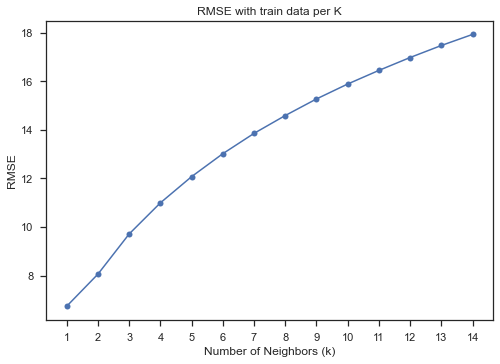

In [136]:
plt.plot(k_values, rmse_trains, marker='o')
plt.title("RMSE with train data per K")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("RMSE")
plt.xticks(k_values)
plt.show()

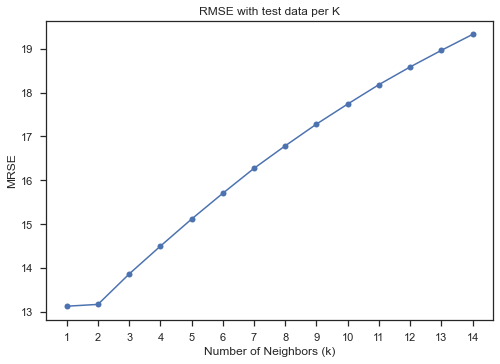

In [134]:
plt.plot(k_values, rmse_tests, marker='o')
plt.title("RMSE with test data per K")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("MRSE")
plt.xticks(k_values)
plt.show()

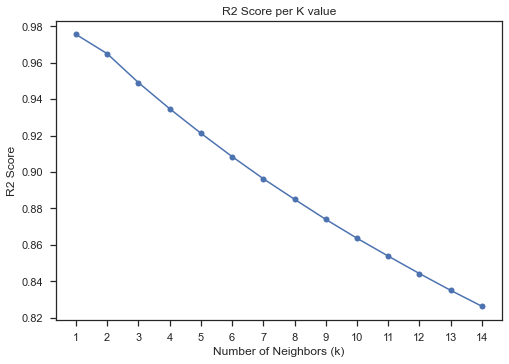

In [135]:
plt.plot(k_values, scores, marker='o')
plt.title("R2 Score per K value")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("R2 Score")
plt.xticks(k_values)
plt.show()

From the plots we can see that the better performances are with k=1 and k=2, and the performance is getting worse as K increases. This means that each prediction is made by finding the single (in case of K=1) closest data point (nearest neighbor) in the training dataset and using its target value as the prediction

In [137]:
pipeline_knn_k1 = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                                      ("model", neighbors.KNeighborsRegressor(n_neighbors=1))])
pipeline_knn_k1.fit(X_train, y_train)
y_train_knn1_predicted = pipeline_knn_k1.predict(X_train)

In [138]:
rmse_knn1_train = metrics.mean_squared_error(y_train, y_train_knn1_predicted, squared=False)
rmse_knn1_train

6.73647438138637

In [141]:
y_test_knn1_predicted = pipeline_knn_k1.predict(X_test)
rmse_knn1_test = metrics.mean_squared_error(y_test, y_test_knn1_predicted, squared=False)
rmse_knn1_test

13.127423663345752

In [142]:
r2_knn1 = metrics.r2_score(y_test, y_test_knn1_predicted)
r2_knn1

0.9053901586022461

With K=1, we get a good performance, but it is worse compared with other models. We can say also that the model predicts worse for unseen data.

Let's see with K=2.

In [143]:
pipeline_knn_k2 = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                                      ("model", neighbors.KNeighborsRegressor(n_neighbors=2))])
pipeline_knn_k2.fit(X_train, y_train)
y_train_knn2_predicted = pipeline_knn_k2.predict(X_train)

In [144]:
rmse_knn2_train = metrics.mean_squared_error(y_train, y_train_knn2_predicted, squared=False)
rmse_knn2_train

8.059954770541962

In [146]:
y_test_knn2_predicted = pipeline_knn_k2.predict(X_test)
rmse_knn2_test = metrics.mean_squared_error(y_test, y_test_knn2_predicted, squared=False)
rmse_knn2_test

13.168817959073195

In [147]:
r2_knn2 = metrics.r2_score(y_test, y_test_knn2_predicted)
r2_knn2

0.9047925573607989

As we see in the plots, with K=2 the performance is a bit worse than with K=1.

### Linear Regression<a name="lr"></a>

In [148]:
pipeline_lr = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                              ('model', LinearRegression())])

pipeline_lr.fit(X_train, y_train)
y_train_lr_predicted = pipeline_lr.predict(X_train)
rmse_lr_train = mean_squared_error(y_train, y_train_lr_predicted, squared=False)
rmse_lr_train

5.410751075854949

In [150]:
r2_lr_train = metrics.r2_score(y_train, y_train_lr_predicted)
r2_lr_train

0.984189612566137

In [151]:
y_test_lr_predicted = pipeline_lr.predict(X_test)
rmse_lr_test = mean_squared_error(y_test, y_test_lr_predicted, squared=False)
rmse_lr_test

5.493815320752084

In [152]:
r2_lr_test = metrics.r2_score(y_test, y_test_lr_predicted)
r2_lr_test

0.9834298887703052

With Linear Regression, the model predicts well with seen and unseen data, with high R2 score and a RMSE of 5.4 minutes.

##  Conclusion <a name="conclusion"></a>

We have seen that the arrive delay is affected mainly by the Carrier Delay, Weather Delay, NAS Delay and the Late Aircraft Delay.

Southwest is the carrier with most number of delays where the Late Aircraft Delay is the principal type of delay. We see also that there are also routes with more number of delays than others.

Based on that, and the number of routes, aircraft and flights I recomend to the Soutwest to take a look at the to the aircraft scheduled, and their network in order to reduce the late aircraft delay. Check the maintenance time of the aircraft. Also consider to buy aircrafts in order to prevent the delays.

In order to predict the delay, we can user Random Forest as model, given that it was the model with the best performance.

------------------------------

# Appendix<a name="appendix"></a>

We suggested to check the type aircraft of Southwest Airlines in order to validate if them are correct to the routes.

To do that, I found a page that cointans information abouth aircrafts. In order to get the information I will apply Web Scraping using Selenium.

In [91]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [92]:
from selenium import webdriver
from selenium.webdriver.common.by import By
driver = webdriver.Chrome()

In [93]:
row = []
rows = []
for tail in df_wn_flights["TailNum"].unique():
    row = []
    try:
        driver.get("https://www.flightradar24.com/data/aircraft/" + tail)
        search_form = driver.find_element(By.ID, "cnt-aircraft-info")
        details = search_form.find_elements(By.CLASS_NAME, "details")
        if details[1].text == 'Southwest Airlines':
            row.append(tail)
            row.append(details[0].text)
            row.append(details[3].text)
            rows.append(row)
    except:
        # After around 16 requests, the site starts a security validation and rejects the requests
        row.append(tail)
        row.append("Error")
        row.append("Error")
        rows.append(row)

Now I will create a data frame that contains the tail number, the model and the code of the aircraft.

In [94]:
colums_name = ["tail", "model", "code"]
df = pd.DataFrame(rows, columns=colums_name)
df

,tail,model,code
0,N712SW,Boeing 737-7H4,B737
1,N772SW,Boeing 737-7H4,B737
2,N219WN,Boeing 737-7H4,B737
3,N743SW,Boeing 737-7H4,B737
4,N449WN,Boeing 737-7H4,B737
...,...,...,...
536,N678AA,Error,Error
537,N255WN,Boeing 737-7H4,B737
538,N527SW,Boeing 737-5H4,B735
539,N523SW,Boeing 737-5H4,B735


Now I will call again the page to get the information of the aircrafts that whose request was rejected.

In case of exception I use a sleep in order to give time to the site to restore from the security validation.

In [96]:
import time

while len(df[df["code"] == "Error"]) > 0:
    for index, row in df[df["code"] == "Error"].iterrows():
        try:
            driver.get("https://www.flightradar24.com/data/aircraft/" + row["tail"])
            search_form = driver.find_element(By.ID, "cnt-aircraft-info")
            details = search_form.find_elements(By.CLASS_NAME, "details")
            if details[1].text == 'Southwest Airlines':
                df.at[index, "model"] = details[0].text
                df.at[index, "code"] = details[3].text
            else:
                df.at[index, "model"] = "Invalid"
                df.at[index, "code"] = "Invalid"
        except:
            df.at[index, "model"] = "Error"
            df.at[index, "code"] = "Error"
            time.sleep(5)

In [100]:
df["code"].value_counts()

B737       318
B733       114
Invalid     95
B735        14
Name: code, dtype: int64

The records that have Invalid as code are aircrafts that were found but there is not information.

The carrier has three types of aircrafts:
- B737
- B733
- B735

All belong to the Boeings 737 family. Probably, the missing data belong also to this family.

About these types we can say:
- B737: Short to medium range airliner, in service since 1997.
- B733: Short range airliner, in service since 1984.
- B735: Short range airliner, in service since 1990.

Most of the aircrafts are the 737 family, with short to medium range. The next are the 733 family with 114 aircrafts, we have to say that these are very old (from 1984).